# Enhancing NHS Budgeting Efficiency with Data Analysis of Appointment Trends 

### BACKGROUND

The NHS faces increasing demand driven by population growth, creating pressure to strategically 
expand infrastructure and optimize budgets. A key challenge is the substantial cost incurred 
from missed GP appointments, which strains already limited resources and reduces care 
accessibility. Stakeholders are divided on whether to expand service capacity or improve 
efficiency within existing resources. To address these challenges, a data-driven approach is 
critical for understanding service utilization trends, staffing adequacy, and the underlying causes 
of missed appointments. This analysis aims to uncover actionable insights to aid the NHS in 
capacity planning, efficient budget allocation, and reducing missed appointments without 
negatively impacting vulnerable patients.

### Business questions:
1. Which geographic regions experience the highest volume of GP appointments?
2. Are there specific months or seasons when the frequency of appointments significantly increases?
3. Which service types consistently generate high appointment volumes?
4. Does the time between booking and appointment affect attendance rates?
5. How does the appointment mode (in-person, phone, video) influence attendance and patient engagement?
6. What is the current rate of appointment utilization throughout the year, and when do utilization spikes occur?
7. How can social media (e.g., Twitter) be used to help the NHS? 

In [3]:
#Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## A. Importing Datasets

There 3 avalible dataset containing internal data which have to be imported and sense checked in orther to generate actionable insights: actual_duration.csv, appointments_regional.csv and national_categories.xlsx.

In [6]:
# Importing and sense-check of actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')
# View the DataFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [7]:
# Checking missing values.
ad_na = ad[ad.isna().any(axis=1)]
ad_na.shape

(0, 8)

In [8]:
# Checking the metadata of the data set.
ad.info()
print(ad.columns)
print(ad.dtypes)
print(ad.shape)
print(ad.head())
print(ad.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
sub_icb_location_code        object
sub_icb_location_ons_c

In [9]:
# Determining the descriptive statistics of the data set.
ad['count_of_appointments'].describe()

count    137793.000000
mean       1219.080011
std        1546.902956
min           1.000000
25%         194.000000
50%         696.000000
75%        1621.000000
max       15400.000000
Name: count_of_appointments, dtype: float64

In [10]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')
# View the DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [11]:
# Checking missing values.
nc_na = nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

In [12]:
# Determine the descriptive statistics of the data set.
nc['count_of_appointments'].describe()

count    817394.000000
mean        362.183684
std        1084.576600
min           1.000000
25%           7.000000
50%          25.000000
75%         128.000000
max       16590.000000
Name: count_of_appointments, dtype: float64

In [13]:
# Checking the metadata of the data set.
nc.info()
print(nc.columns)
print(nc.dtypes)
print(nc.shape)
print(nc.head())
print(nc.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
appointment_d

In [14]:
# Importing and sense-check of appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')
# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [15]:
# Checking missing values.
ar_na = ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

In [16]:
# Determining the metadata of the data set.
ar.info()
print(ar.columns)
print(ar.dtypes)
print(ar.shape)
print(ar.head())
print(ar.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
icb_ons_code                         object
appointment_month     

In [17]:
# Determine the descriptive statistics of the data set.
ar['count_of_appointments'].describe()

count    596821.000000
mean       1244.601857
std        5856.887042
min           1.000000
25%           7.000000
50%          47.000000
75%         308.000000
max      211265.000000
Name: count_of_appointments, dtype: float64

# B. Exploratory Data Analysis (EDA)

In [19]:
# Determine the number of service settings.
service_setting_count = nc['service_setting'].value_counts()
print(service_setting_count)

service_setting
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: count, dtype: int64


In [20]:
# Determine the number of context types.
context_types_count = nc['context_type'].value_counts()
print(context_types_count)

context_type
Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: count, dtype: int64


In [21]:
# Determine the number of appointment statuses.
ap_status_count = ar['appointment_status'].value_counts()
print(ap_status_count)

appointment_status
Attended    232137
Unknown     201324
DNA         163360
Name: count, dtype: int64


In [22]:
#Viewing heads of the data sets in order to check the date format.
print(ad['appointment_date'].head())
print(nc['appointment_date'].head())
print(ar['appointment_month'].head())

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object
0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]
0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object


In [37]:
# Convert 'appointment_date' with format like "01-Dec-21"
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y', errors='coerce')

# Convert 'appointment_month' with format like "2020-01"
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'], format='%Y-%m', errors='coerce')

In [33]:
#Checking if corrections were applied.
print(ad['appointment_date'].head())
print(nc['appointment_date'].head())
print(ar['appointment_month'].head())

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]
0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]
0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object


In [39]:
# Determining the minmum and maximum dates in DataFrames.
#checking min dates.
ad_min = ad['appointment_date'].min()
nc_min = nc['appointment_date'].min()
ar_min = ar['appointment_month'].min()
#checking max dates.
ad_max = ad['appointment_date'].max()
nc_max = nc['appointment_date'].max()
ar_max = ar['appointment_month'].max()

In [40]:
#Viewing ad minimum and maximum date.
print(ad_min)
print(ad_max)

2021-12-01 00:00:00
2022-06-30 00:00:00


In [41]:
#Viewing nc minimum and maximum date.
print(nc_min)
print(nc_max)

2021-08-01 00:00:00
2022-06-30 00:00:00


In [42]:
#Viewing ar minimum and maximum date.
print(ar_min)
print(ar_max)

2020-01-01 00:00:00
2022-06-01 00:00:00


# C. Analyzing the Number of Appointments by Location


In [44]:
#Creating a subset of national_cathegories to look at specific variables.
nc_subset = pd.read_excel('national_categories.xlsx', 
                   usecols=['sub_icb_location_name', 'service_setting', 
                            'appointment_date','count_of_appointments'])


In [45]:
#Idetifying the number of locations in DataFrame and grouping by location.
nc_location_gr = nc_subset.groupby(['sub_icb_location_name'])\
['count_of_appointments'].sum().reset_index()
nc_location_gr

,sub_icb_location_name,count_of_appointments
0,NHS Bath and North East Somerset Swindon and W...,5242176
1,NHS Bedfordshire Luton and Milton Keynes ICB -...,4838515
2,NHS Birmingham and Solihull ICB - 15E,6383746
3,NHS Black Country ICB - D2P2L,7033637
4,NHS Bristol North Somerset and South Glouceste...,4899508
...,...,...
101,NHS West Yorkshire ICB - 02T,1167094
102,NHS West Yorkshire ICB - 03R,2189894
103,NHS West Yorkshire ICB - 15F,4551619
104,NHS West Yorkshire ICB - 36J,4044545


In [46]:
#Identifying 10 locations with highest number of appoinments.
top_10_locations = nc_location_gr.nlargest(10, 'count_of_appointments')
top_10_locations

,sub_icb_location_name,count_of_appointments
76,NHS North West London ICB - W2U3Z,12142390
67,NHS North East London ICB - A3A8R,9588891
47,NHS Kent and Medway ICB - 91Q,9286167
36,NHS Hampshire and Isle Of Wight ICB - D9Y0V,8288102
82,NHS South East London ICB - 72Q,7850170
21,NHS Devon ICB - 15N,7447758
83,NHS South West London ICB - 36L,7155030
3,NHS Black Country ICB - D2P2L,7033637
66,NHS North Central London ICB - 93C,6747958
2,NHS Birmingham and Solihull ICB - 15E,6383746


In [47]:
# Filtering dat by location to see numer of 
# appointments per month for NHS North West London ICB
filtered_df = nc[nc["sub_icb_location_name"] == "NHS North West London ICB - W2U3Z"]

# Group by appointment month and sum the count of appointments
result = filtered_df.groupby("appointment_month")["count_of_appointments"].sum().reset_index()

# Display the result
print(result)

   appointment_month  count_of_appointments
0            2021-08                 981385
1            2021-09                1144590
2            2021-10                1180674
3            2021-11                1204118
4            2021-12                1022195
5            2022-01                1050517
6            2022-02                1053468
7            2022-03                1232596
8            2022-04                1006387
9            2022-05                1163863
10           2022-06                1102597


The highest number of appointments was observed in November which should be further explored to find patterns in patients beahviour. 

##### Identifying Locations with the Highest and Lowest Number of Appointments

In [50]:
# Filtering for November 2021
november_data = nc[(nc['appointment_date'].dt.month == 11) & 
                   (nc['appointment_date'].dt.year == 2021)]

# Grouping and summing appointments
nc_location_gr = november_data.groupby(
    ['sub_icb_location_name']
)['count_of_appointments'].sum().reset_index()

# Top 3 and bottom 3 locations
top_3_locations = nc_location_gr.nlargest(3, 'count_of_appointments')
toplow_3_locations = nc_location_gr.nsmallest(3, 'count_of_appointments')

# Combining top and bottom locations
combined_locations = pd.concat([top_3_locations, toplow_3_locations], ignore_index=True)

print(combined_locations.head())  # Debugging step

                        sub_icb_location_name  count_of_appointments
0           NHS North West London ICB - W2U3Z                1204118
1           NHS North East London ICB - A3A8R                 968353
2               NHS Kent and Medway ICB - 91Q                 963115
3  NHS Lancashire and South Cumbria ICB - 02G                  57402
4       NHS Cheshire and Merseyside ICB - 01T                  63765


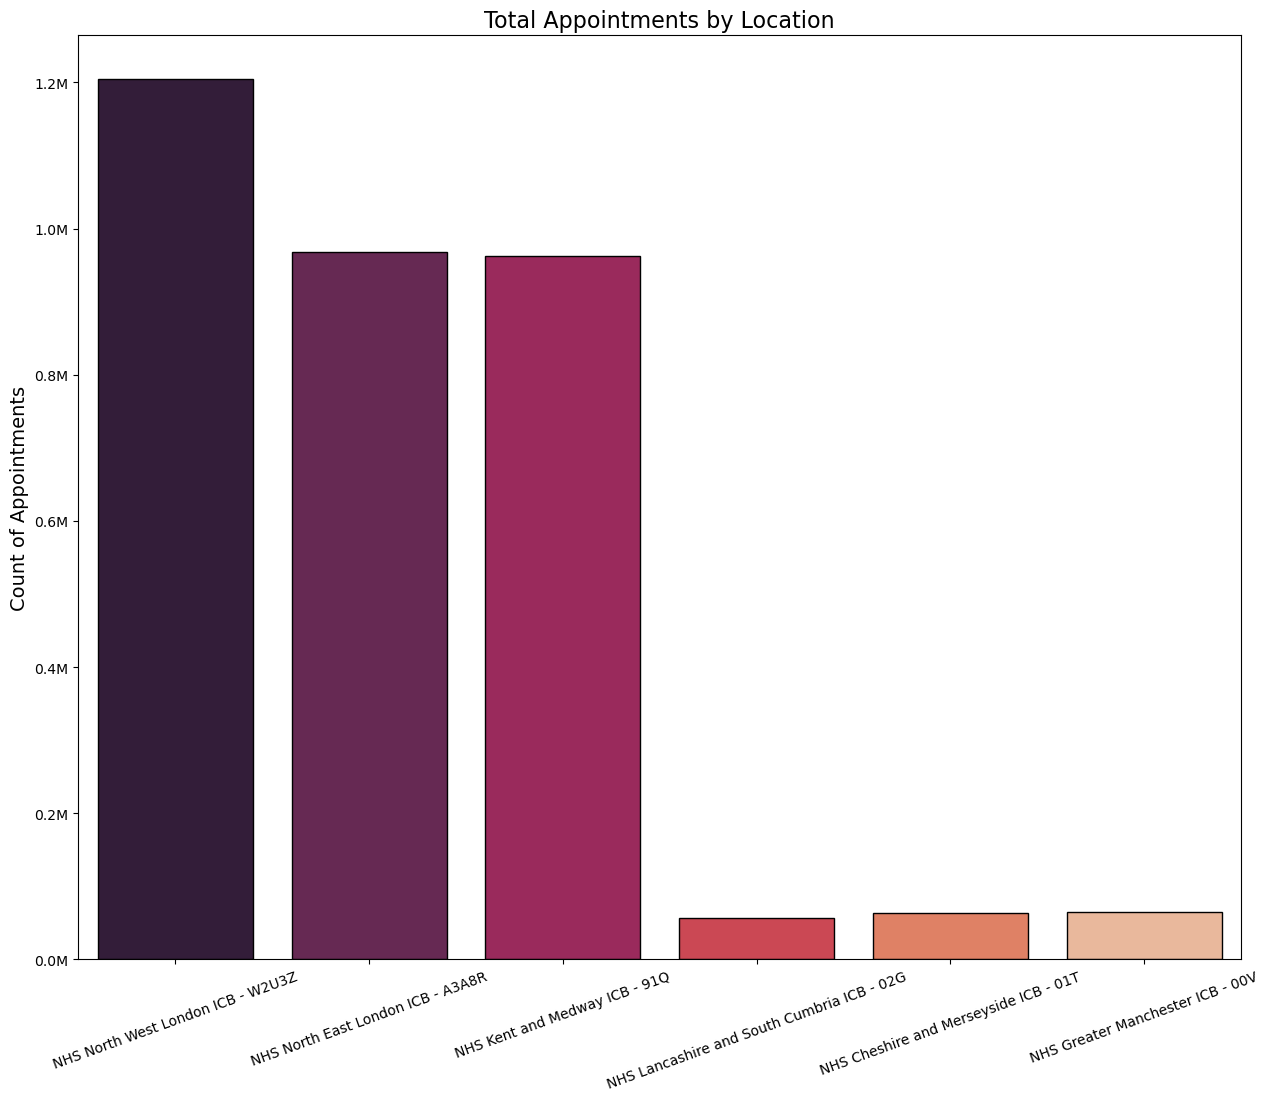

In [51]:
from matplotlib.ticker import FuncFormatter  # Format axis ticks (e.g., 1,000,000 -> 1M)

# Set up plot size
plt.figure(figsize=(15, 12))

# Formatter function for displaying values in millions
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'

# Create bar plot
sns.barplot(x='sub_icb_location_name', y='count_of_appointments',
            data=combined_locations, hue='sub_icb_location_name',
            palette='rocket', edgecolor='black', legend=False)

# Add title and labels
plt.title('Total Appointments by Location', fontsize=16)
plt.xlabel('')
plt.ylabel('Count of Appointments', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=20, fontsize=10)

# Apply custom y-axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

# Save as JPEG
plt.savefig("location2.jpeg", format="jpeg", dpi=200)
plt.show()

This chart highlights that numbers of appoinments significantly deviate from the average depending on lociation with some locations like NWL (NHS North West London) experiencing substantially higher demand (1.2 million) compared to LSC(Lancashire and South Cumbria), which recorded 0.06 million appointments, indicating regional disparities in service needs which translates to utilization of capacity

##### Filtering nc DataFrame by dates to see appointments for NHS North West London ICB - W2U3Z (highest number of appointments)

In [54]:

# Filtering nc DataFrame by dates to see appointments 
# for NHS North West London ICB - W2U3Z (highest number of appointments
nc_nwl = nc_subset[(nc_subset['sub_icb_location_name']\
.str.strip()=='NHS North West London ICB - W2U3Z')&\
(nc_subset['appointment_date']>='2021-11-08')&\
(nc_subset['appointment_date']<='2021-11-21')&\
(nc_subset['count_of_appointments'])]
nc_nwl

,appointment_date,sub_icb_location_name,service_setting,count_of_appointments
798153,2021-11-08,NHS North West London ICB - W2U3Z,Primary Care Network,1
798154,2021-11-08,NHS North West London ICB - W2U3Z,Primary Care Network,31
798156,2021-11-08,NHS North West London ICB - W2U3Z,Primary Care Network,251
798157,2021-11-08,NHS North West London ICB - W2U3Z,Primary Care Network,49
798159,2021-11-08,NHS North West London ICB - W2U3Z,Other,5
...,...,...,...,...
798698,2021-11-21,NHS North West London ICB - W2U3Z,General Practice,15
798701,2021-11-21,NHS North West London ICB - W2U3Z,General Practice,281
798702,2021-11-21,NHS North West London ICB - W2U3Z,General Practice,51
798703,2021-11-21,NHS North West London ICB - W2U3Z,General Practice,25


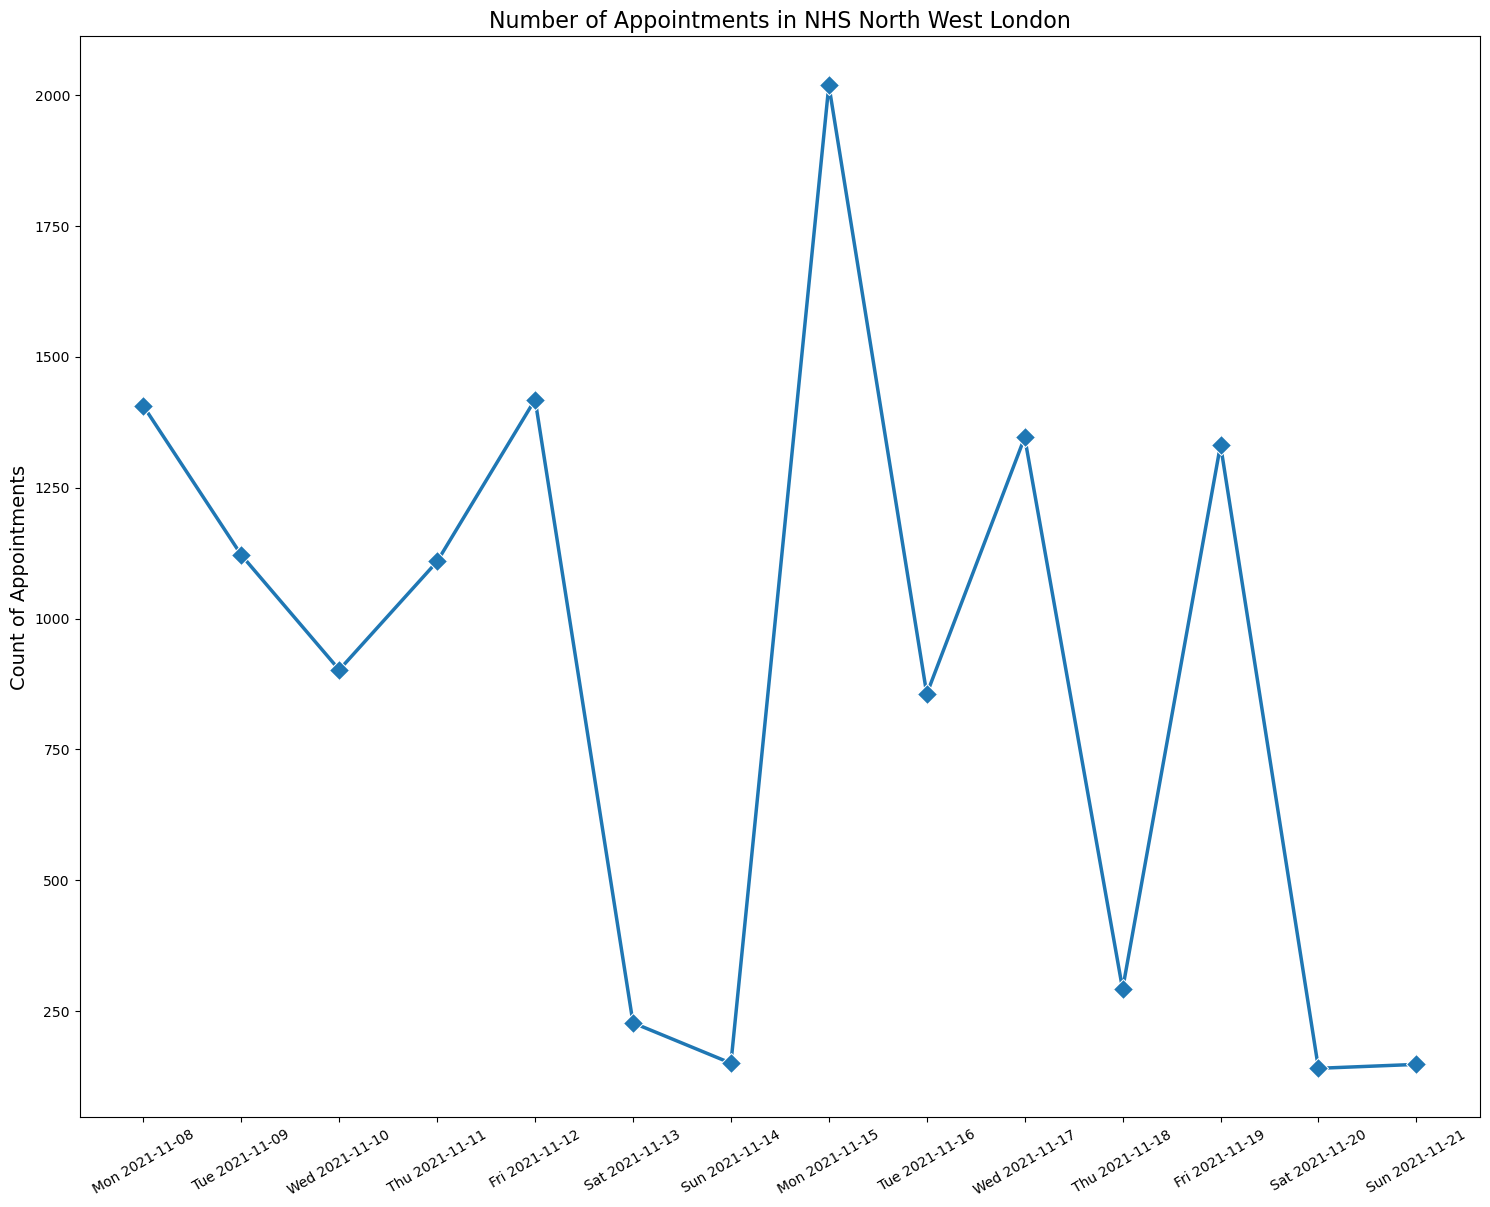

In [55]:
# Lineplot to show appointment trends over time in NHS North West London

# Ensure the 'appointment_date' column is in datetime format
nc_nwl.loc[:, 'appointment_date'] = pd.to_datetime(nc_nwl['appointment_date'])

# Set up the figure
plt.figure(figsize=(15, 12))

# Create the lineplot
sns.lineplot(x='appointment_date', y='count_of_appointments',
             linewidth=2.5, marker='D', markersize=10,
             data=nc_nwl, errorbar=None) 

# Add title and labels
plt.title('Number of Appointments in NHS North West London', fontsize=16)
plt.xlabel('', fontsize=8)
plt.ylabel('Count of Appointments', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=30)
plt.tight_layout()

# Format x-axis dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %Y-%m-%d'))

# Save plot as JPEG
plt.savefig("visuals NWL.jpeg", format="jpeg", dpi=200)
plt.show()

##### Filtering nc DataFrame by dates to see appointments for NHS Cheshire and Merseyside ICB (the lowest number of appointments)

In [57]:
# Filtering nc DataFrame by dates 
nc_LSB = nc_subset[(nc_subset['sub_icb_location_name'].str.strip()=='NHS Cheshire and Merseyside ICB - 01V') & \
(nc_subset['appointment_date']>='2021-11-08')&\
(nc_subset['appointment_date']<='2021-11-21')&\
(nc_subset['count_of_appointments'])]
nc_LSB

,appointment_date,sub_icb_location_name,service_setting,count_of_appointments
96269,2021-11-08,NHS Cheshire and Merseyside ICB - 01V,Primary Care Network,1
96271,2021-11-08,NHS Cheshire and Merseyside ICB - 01V,General Practice,503
96272,2021-11-08,NHS Cheshire and Merseyside ICB - 01V,Extended Access Provision,1
96278,2021-11-08,NHS Cheshire and Merseyside ICB - 01V,Primary Care Network,1
96279,2021-11-08,NHS Cheshire and Merseyside ICB - 01V,General Practice,419
...,...,...,...,...
96405,2021-11-19,NHS Cheshire and Merseyside ICB - 01V,Other,3
96406,2021-11-19,NHS Cheshire and Merseyside ICB - 01V,General Practice,465
96408,2021-11-19,NHS Cheshire and Merseyside ICB - 01V,General Practice,93
96409,2021-11-19,NHS Cheshire and Merseyside ICB - 01V,General Practice,1289


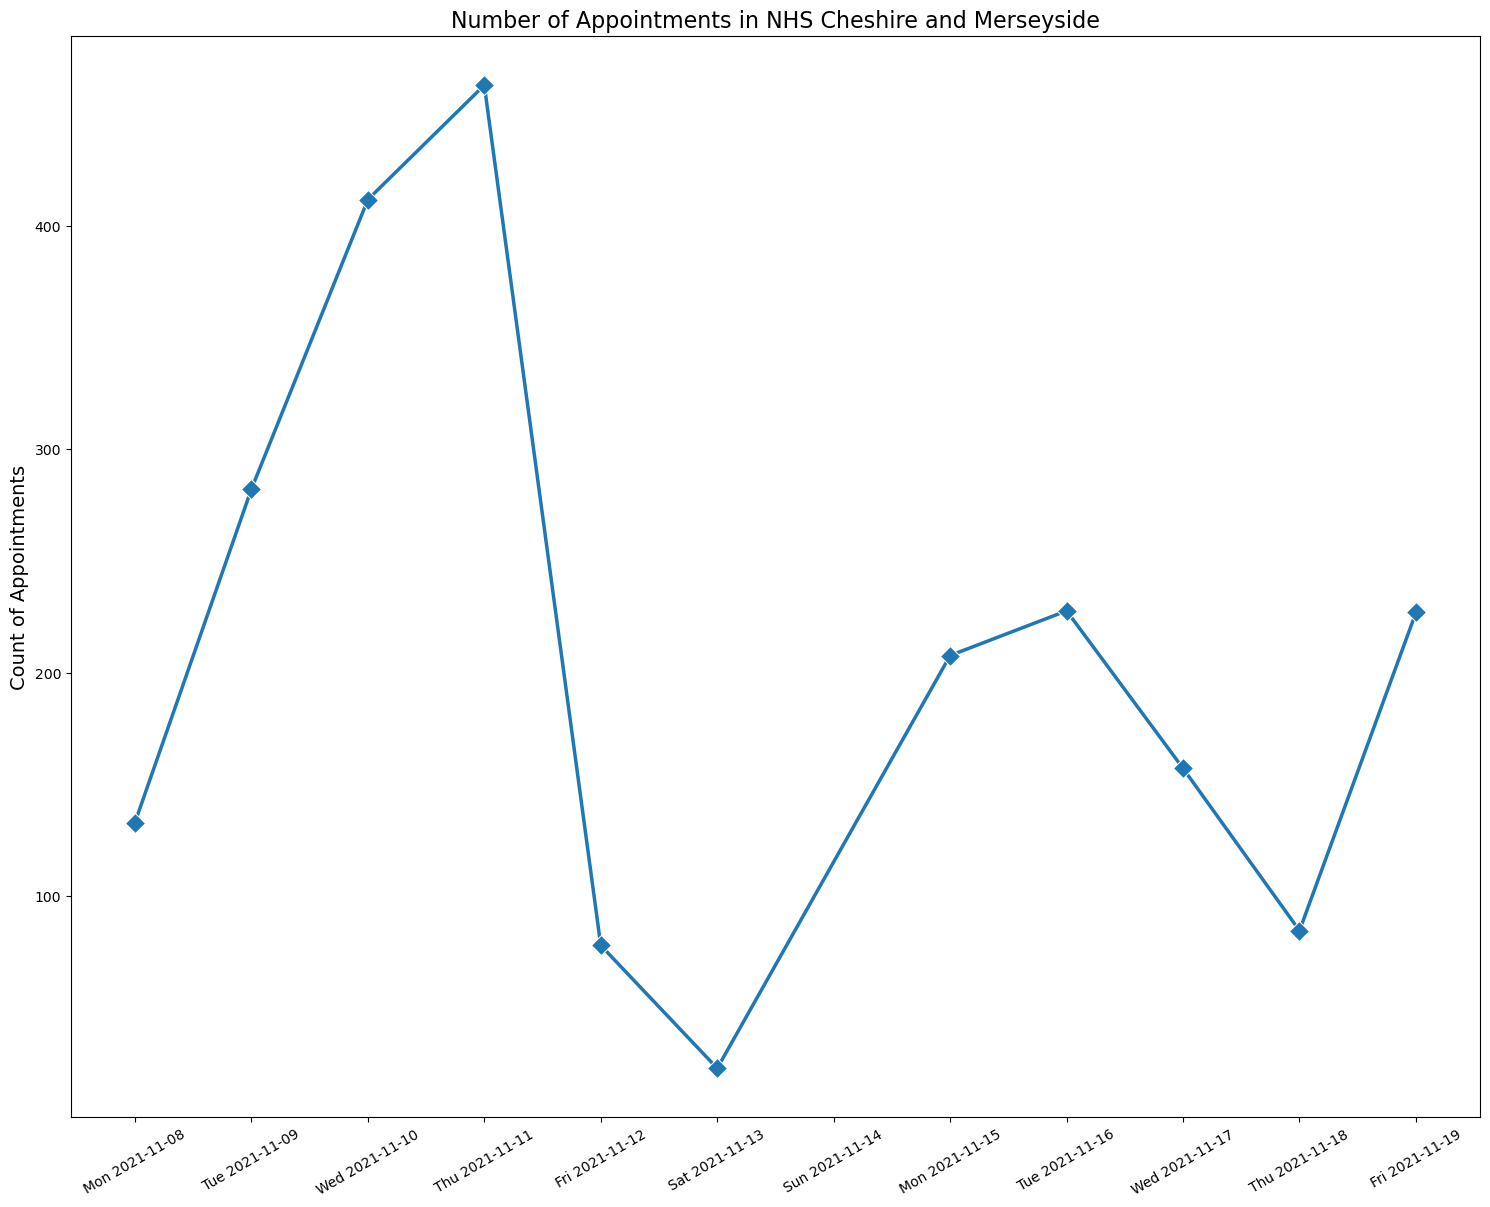

In [58]:
# Ensure the 'appointment_date' column is in datetime format
nc_nwl.loc[:, 'appointment_date'] = pd.to_datetime(nc_nwl['appointment_date'])

# Plot the lineplot
plt.figure(figsize=(15,12))
sns.lineplot(x='appointment_date', y='count_of_appointments',
             linewidth=2.5, marker='D', markersize=10,
             data=nc_LSB, errorbar=None)  

# Adding labels and title
plt.title('Number of Appointments in NHS Cheshire and Merseyside', fontsize=16)
plt.xlabel('', fontsize=8)
plt.ylabel('Count of Appointments', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)
plt.tight_layout()

# Use DayLocator for daily ticks, and set the start of the week
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %Y-%m-%d'))

# Saving as jpeg
plt.savefig("visuals LSB.jpeg", format="jpeg", dpi=200)
plt.show()

Both time scales of the loctaion with the highest and lowest number of appoinmtes highlight the difference in demand in the busiest time during the anlised period between locations. High deviation sbetween location in terms of appouintemts between location suggest different levels of utitlisation.  

# D. Identifying Monthly Patterns in Appointment Frequencies Based on Service Types 


In [61]:
# Grouping national_cathegories by 'service_setting' and sum 'count_of_appointments'
grouped_nc_nwl = nc_nwl.groupby('service_setting')\
['count_of_appointments'].sum()
# Viewing reults.
grouped_nc_nwl

service_setting
Extended Access Provision      6601
General Practice             277325
Other                          8415
Primary Care Network           5486
Unmapped                      17923
Name: count_of_appointments, dtype: int64

Clear idication of differences between different service settings.
To be explored at more granular level for all locations.

In [63]:
#Creating lineplots from national_cathegories filtered by appoitment month and service setting.
nc_grby_service_set = nc.groupby(['appointment_month', 'service_setting'])\
['count_of_appointments'].sum().reset_index()
# Convert the 'appointment_month' column to datetime format
nc_grby_service_set['appointment_month'] = pd.to_datetime\
(nc_grby_service_set['appointment_month'])
# View grouped DataFrame
nc_grby_service_set.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,160927
1,2021-08-01,General Practice,21575852
2,2021-08-01,Other,449101
3,2021-08-01,Primary Care Network,432448
4,2021-08-01,Unmapped,1233843


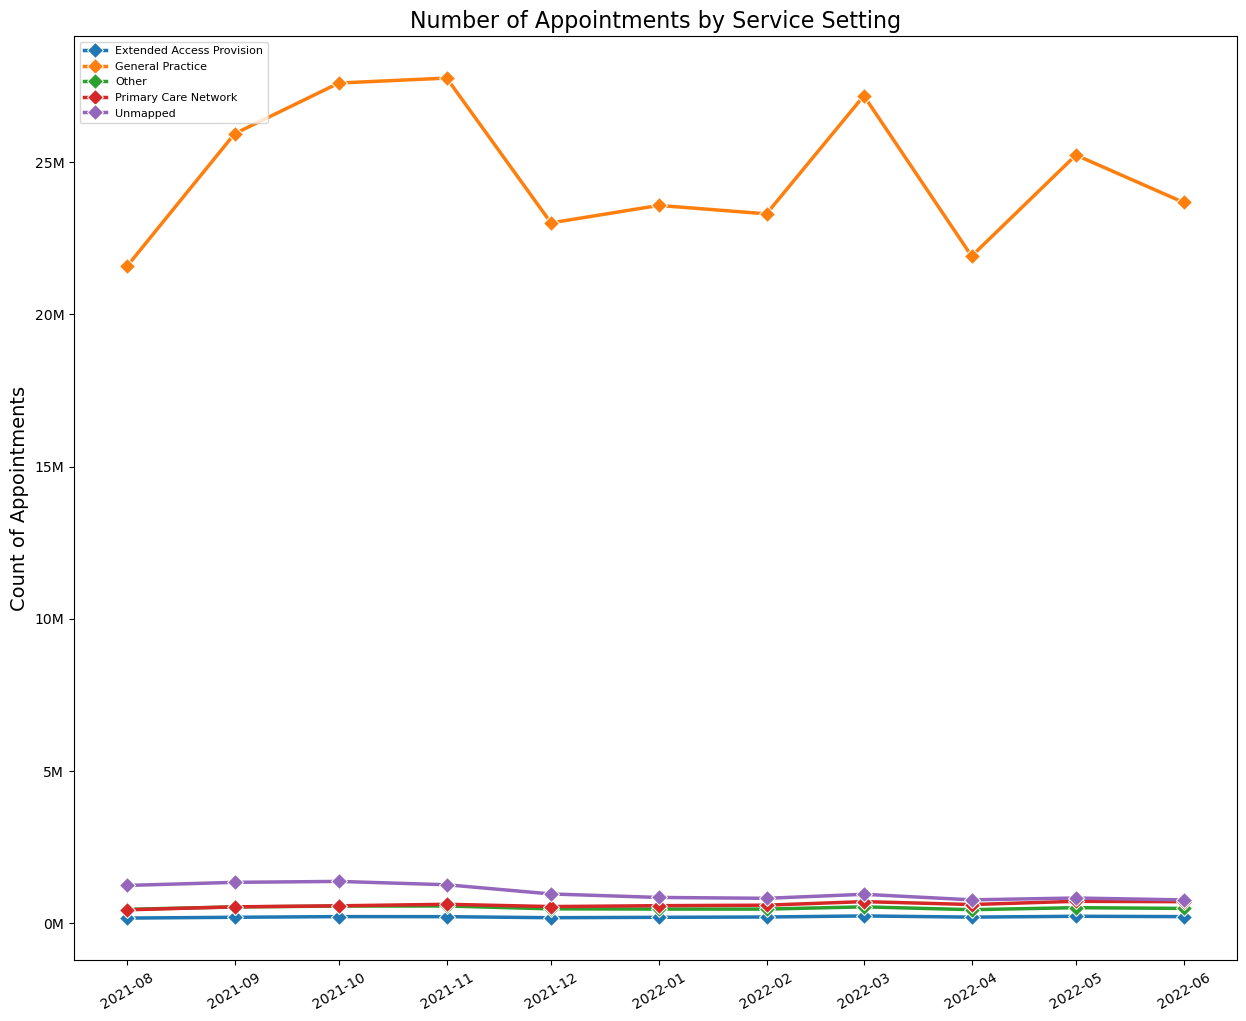

In [64]:
# Importing realvant libraries
from matplotlib.ticker import FuncFormatter
# Define a function to format y-axis in millions
def millions(x, pos):
    return f'{int(x / 1_000_000)}M'
#Creating the lineplot
plt.figure(figsize=(15,12))
sns.lineplot(x='appointment_month', y='count_of_appointments',
             linewidth=2.5,marker='D',markersize=8,
             data=nc_grby_service_set,hue='service_setting',
             errorbar=None)
#Customise the legend / add title and labels.
plt.legend(fontsize='8',loc='upper left')
plt.title('Number of Appointments by Service Setting',fontsize=16)
plt.xlabel('')
plt.ylabel('Count of Appointments',fontsize=14)
# Rotate x-axis labels for better readability
plt.xticks(rotation=30)
# Apply the millions formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
# Saving as jpeg
plt.savefig(("visuals.jpeg"), format="jpeg", dpi=200)


The line plot highlights the disparity in appointment numbers, with GP services consistently higher, oscillating around 24 million, while other service settings recorded fewer than 2 million appointments. Seasonal patterns were evident, with GP appointments peaking in Autumn (September–November), decreasing over winter, and rising again in March. 

In [66]:
#Creating lineplots from national cathegories filtered by appoitment month and context_type.
nc_grby_context_type = nc.groupby(['appointment_month', 'context_type'])\
['count_of_appointments'].sum().reset_index()
# Convert the 'appointment_month' column to datetime format
nc_grby_context_type['appointment_month'] = pd.to_datetime\
(nc_grby_context_type['appointment_month'])
# View grouped DataFrame
nc_grby_context_type.head()

,appointment_month,context_type,count_of_appointments
0,2021-08-01,Care Related Encounter,20255235
1,2021-08-01,Inconsistent Mapping,2363093
2,2021-08-01,Unmapped,1233843
3,2021-09-01,Care Related Encounter,24404251
4,2021-09-01,Inconsistent Mapping,2782135


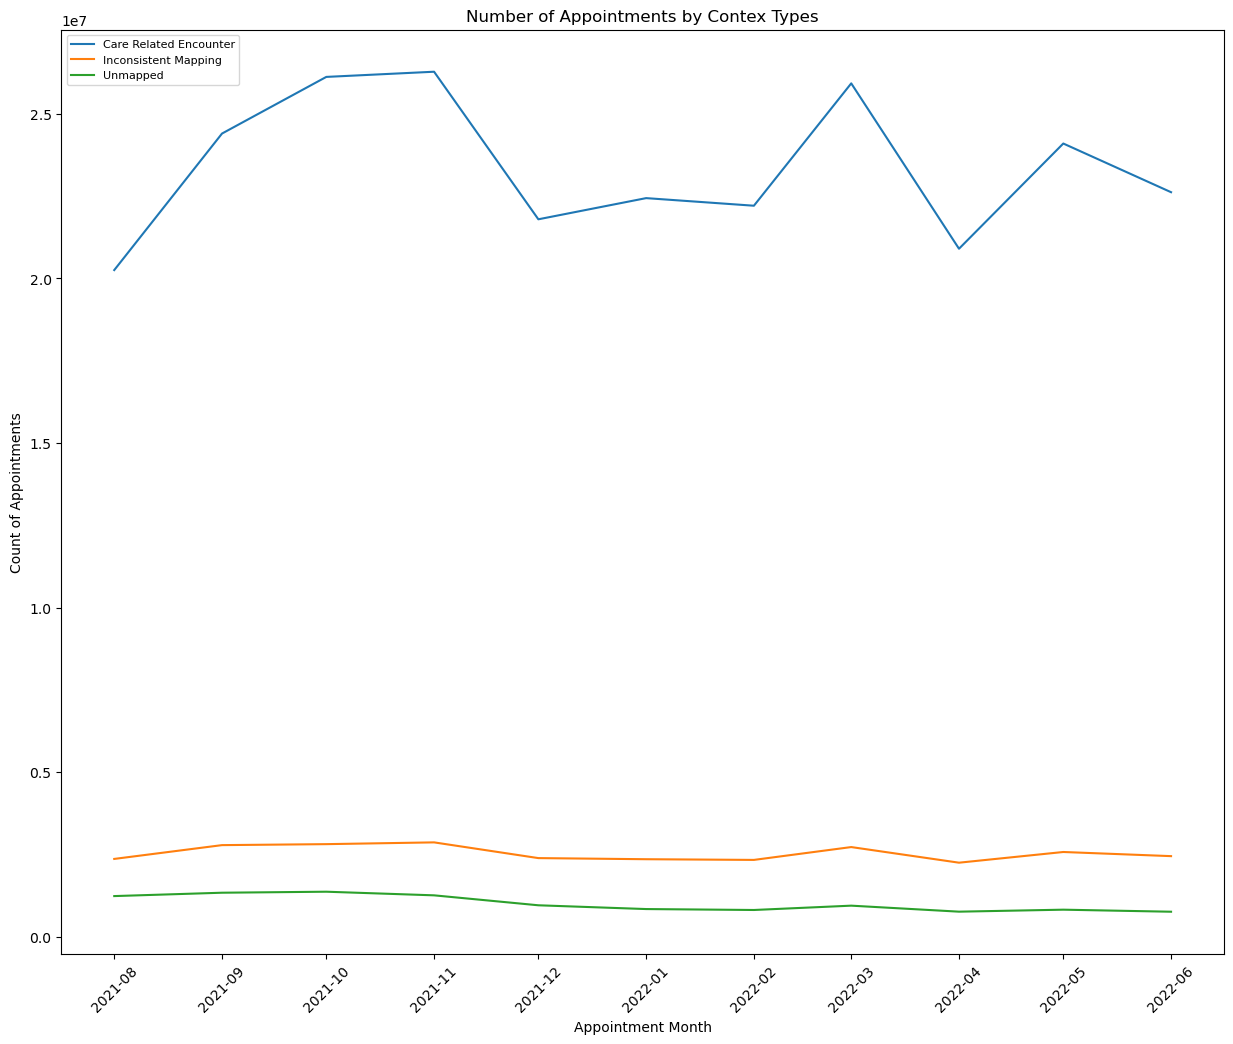

In [67]:
#Creating the lineplot
plt.figure(figsize=(15,12))
sns.lineplot(x='appointment_month', y='count_of_appointments', 
             data=nc_grby_context_type,hue='context_type', 
             errorbar=None)
#Customise the legend / add title and labels.
plt.legend(fontsize='8',loc='upper left')
plt.title('Number of Appointments by Contex Types')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Saving as jpeg
plt.savefig(("visuals 2.jpeg"), format="jpeg", dpi=200)

In [68]:
#Creating lineplots from national cathegories filtered by appoitment month and national category.
nc_grby_national_category = nc.groupby(['appointment_month', 'national_category'])\
['count_of_appointments'].sum().reset_index()
# Convert the 'appointment_month' column to datetime format
nc_grby_national_category['appointment_month'] = pd.to_datetime\
(nc_grby_national_category['appointment_month'])
# View grouped DataFrame
nc_grby_national_category

,appointment_month,national_category,count_of_appointments
0,2021-08-01,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08-01,Care Home Visit,47583
2,2021-08-01,Clinical Triage,3704207
3,2021-08-01,General Consultation Acute,4280920
4,2021-08-01,General Consultation Routine,7756045
...,...,...,...
193,2022-06-01,Social Prescribing Service,55066
194,2022-06-01,Structured Medication Review,187800
195,2022-06-01,Unmapped,758640
196,2022-06-01,Unplanned Clinical Activity,274491


<Figure size 1500x1200 with 0 Axes>

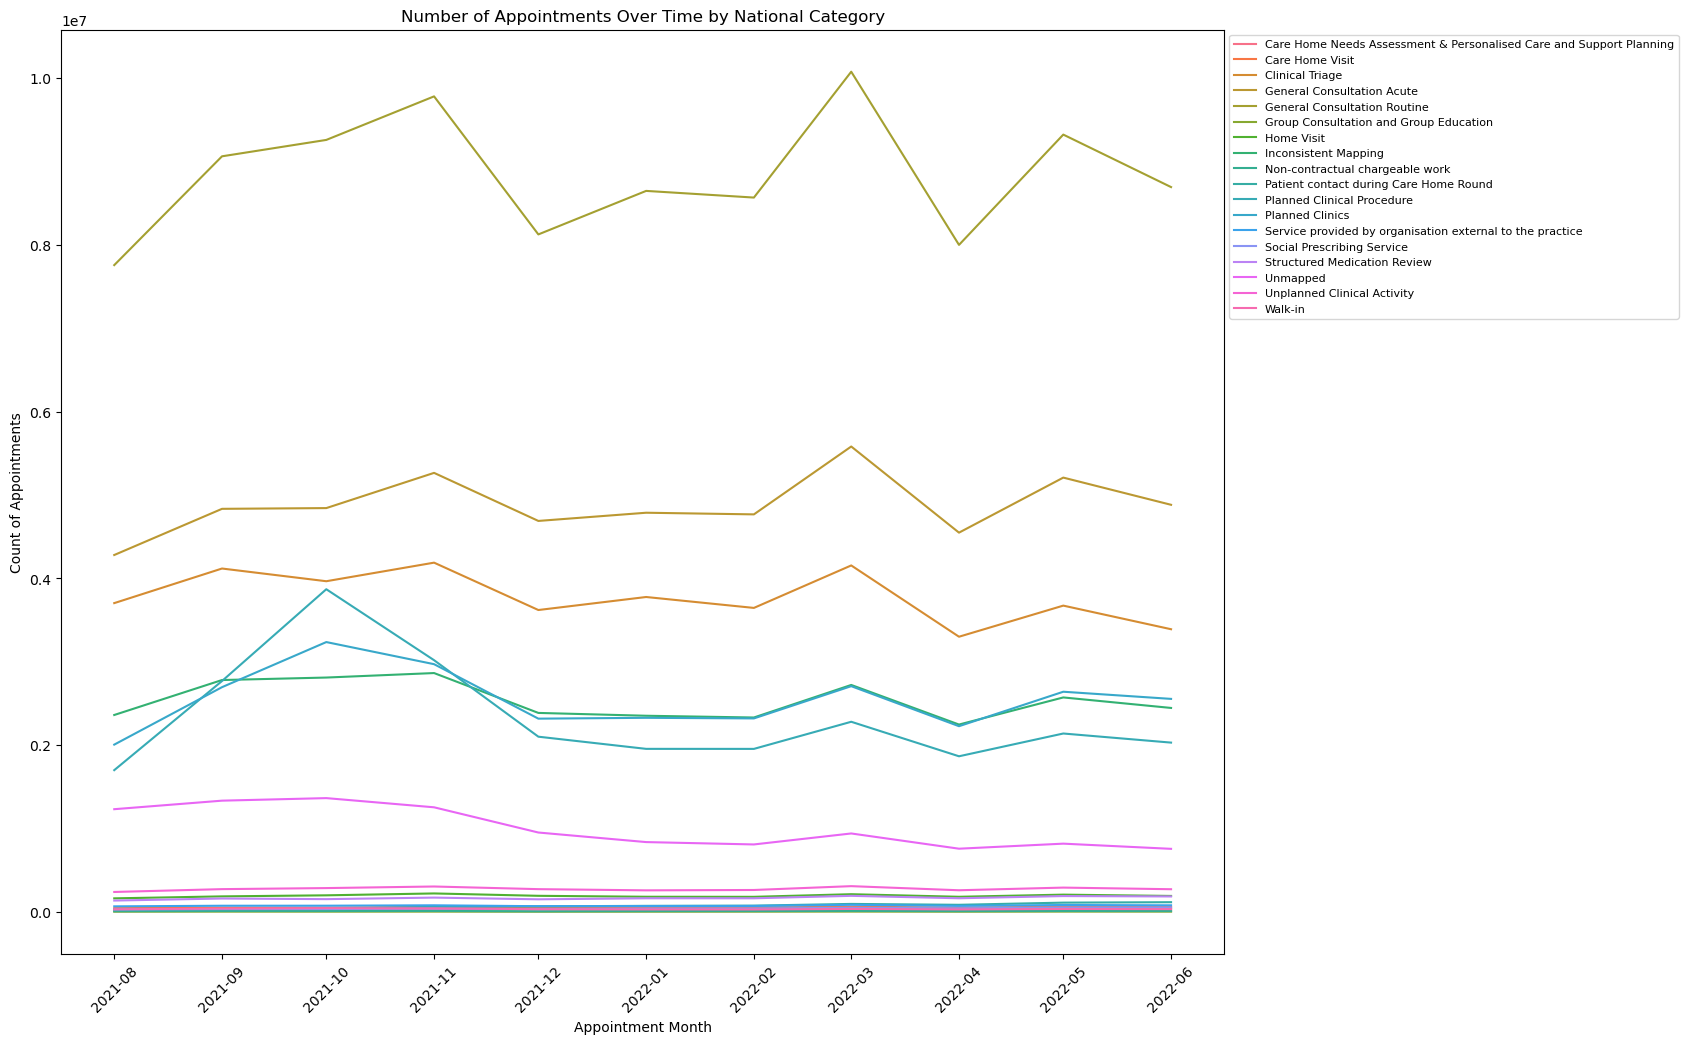

<Figure size 1500x1200 with 0 Axes>

In [69]:
#Creating the lineplot
plt.figure(figsize=(15,12))
sns.lineplot(x='appointment_month', y='count_of_appointments', 
             data=nc_grby_national_category,hue='national_category', 
             errorbar=None)
#Customise the legend / add title and labels.
plt.legend(fontsize='8', loc='upper left',bbox_to_anchor=(1, 1))
plt.title('Number of Appointments Over Time by National Category')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.figure(figsize=(15,12))

# E. Analyzing Seasonal Trends in Appointment Patterns Across Service Settings

Looking at the seasonality of appointments across the data. The time frame of the data was split
into: 
Autumn (2021-09, 2021-10, 2021-11)
Winter (2021-12, 2022-01, 2022-02)
Spring (2022-03, 2022-04, 2022-05)
Summer(2022-06)
Line plots were created to show granularity and present weekly distribution of the appoinments.

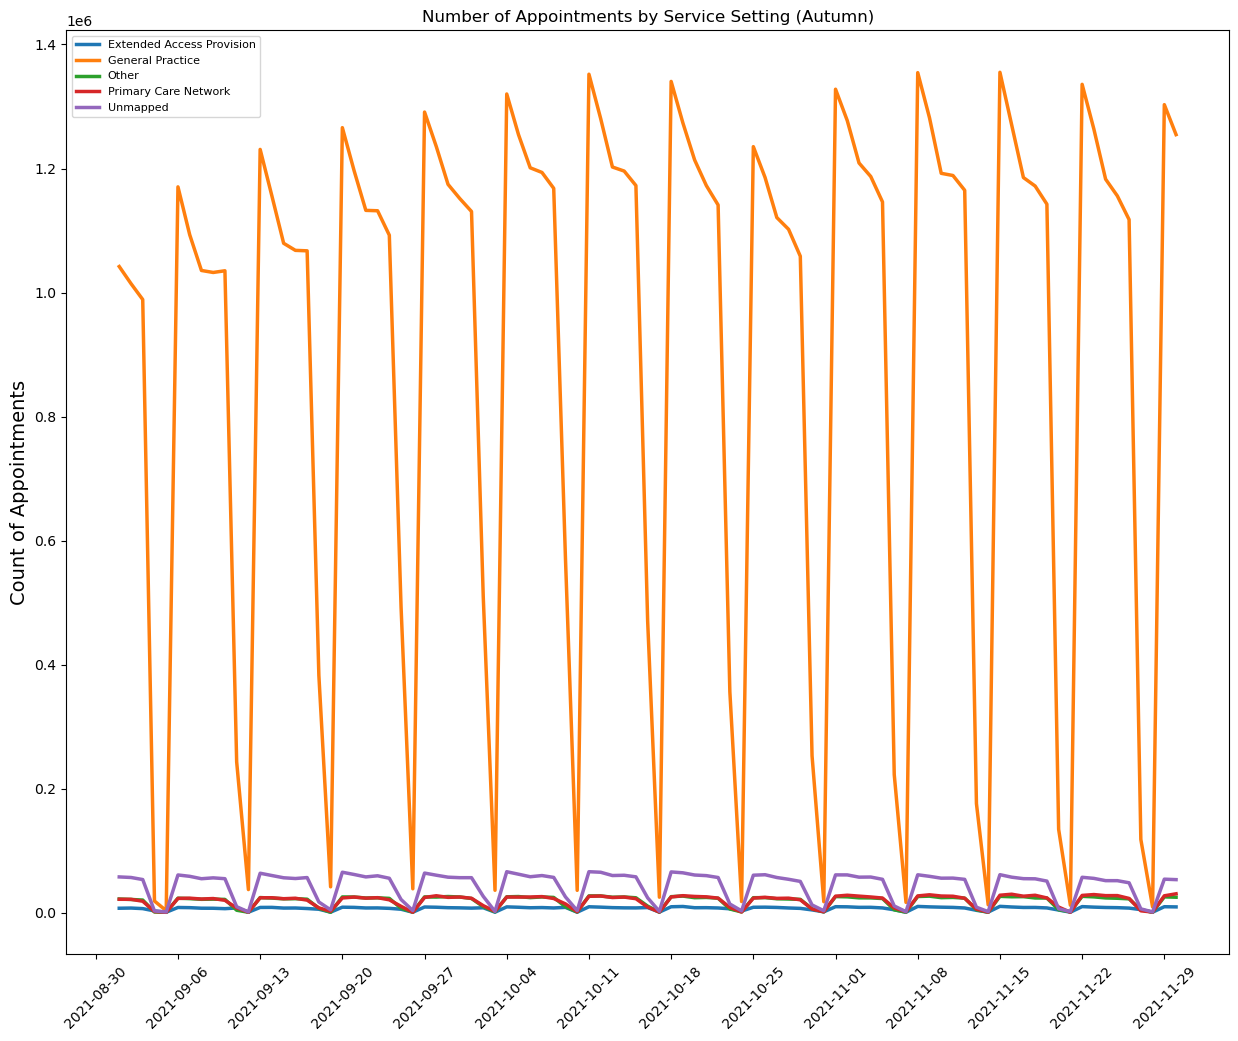

In [72]:
# Filtering for autumn months 
autumn_data = nc[nc['appointment_date'].dt.strftime('%Y-%m')\
.isin(['2021-09', '2021-10', '2021-11'])]
# Grouping by 'appointment_date' and 'service_setting' 
# and summing 'count_of_appointments'
autumn_counts = autumn_data.groupby(['appointment_date', 'service_setting'])\
['count_of_appointments'].sum().reset_index()
#Creating the lineplot.
plt.figure(figsize=(15, 12)) 
sns.lineplot(x='appointment_date', y='count_of_appointments',
             data=autumn_counts, hue='service_setting',
             linewidth=2.5,errorbar=None)
#Customise the legend / add title and labels.
plt.legend(fontsize='8', loc='upper left')
plt.title('Number of Appointments by Service Setting (Autumn)')
plt.xlabel('')
plt.ylabel('Count of Appointments',fontsize=14)
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45) 
# Date format
# Start weeks on Monday
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator
                                (byweekday=mdates.MONDAY, interval=1))
# Saving as jpeg
plt.savefig(("visuals3.jpeg"), format="jpeg", dpi=200)

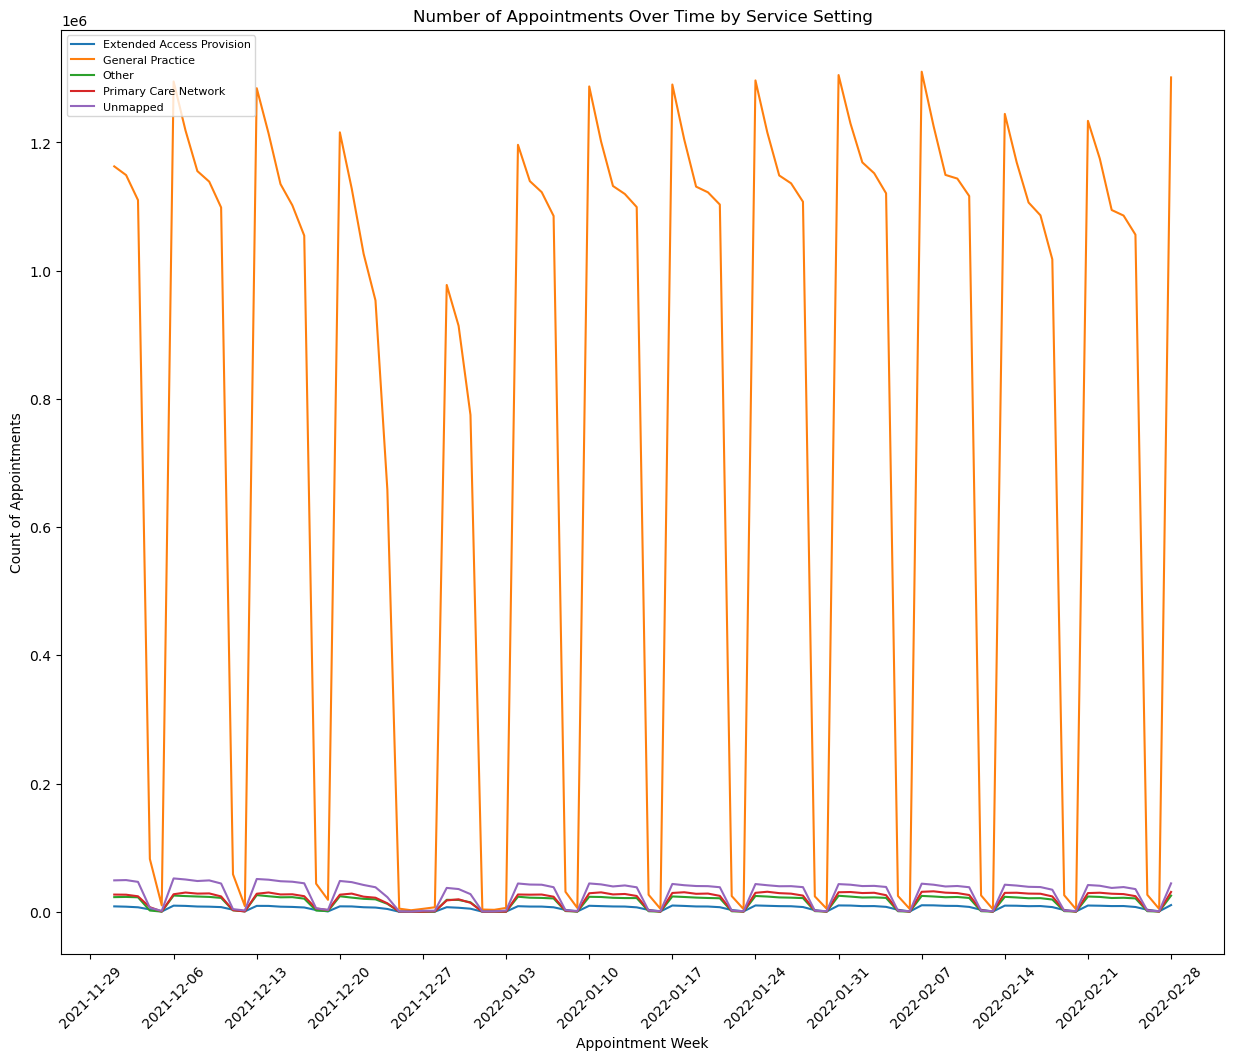

In [73]:
# Filtering for winter months 
winter_data = nc[nc['appointment_date'].dt.strftime('%Y-%m')\
.isin(['2021-12', '2022-01', '2022-02'])]
# Grouping by 'appointment_date' and 'service_setting' 
# and summing 'count_of_appointments'
winter_counts = winter_data.groupby(['appointment_date', 'service_setting'])\
['count_of_appointments'].sum().reset_index()
#Creating the lineplot.
plt.figure(figsize=(15, 12)) 
sns.lineplot(x='appointment_date', 
             y='count_of_appointments', 
             data=winter_counts, 
             hue='service_setting', 
             errorbar=None)
#Customise the legend / add title and labels.
plt.legend(fontsize='8', loc='upper left')
plt.title('Number of Appointments Over Time by Service Setting')
plt.xlabel('Appointment Week')
plt.ylabel('Count of Appointments')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45) 
# Date format
# Start weeks on Monday
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))

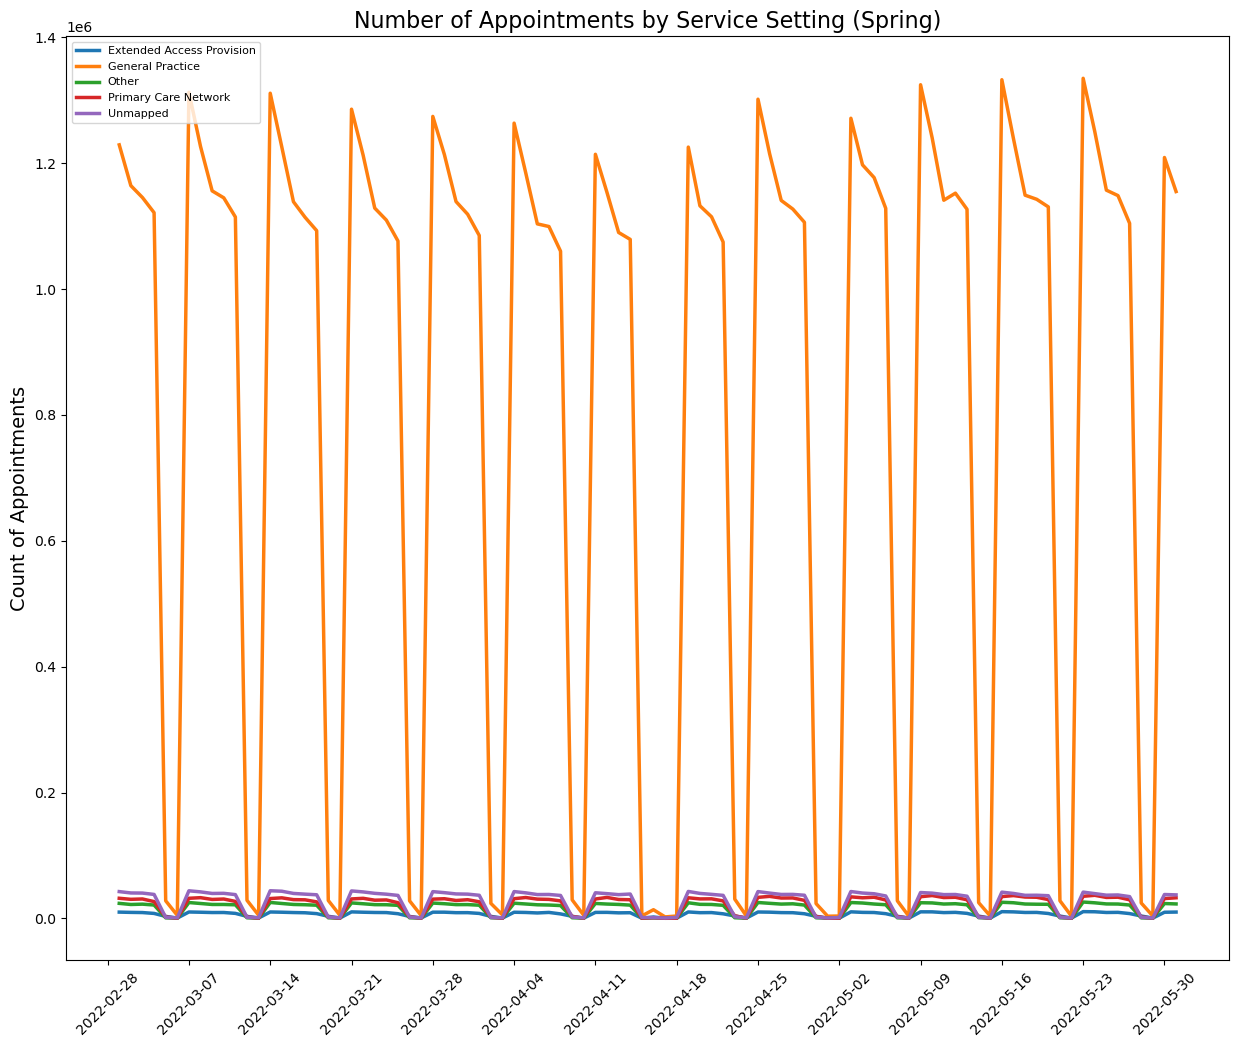

In [74]:
# Filtering for spring months 
spring_data = nc[nc['appointment_date'].dt.strftime('%Y-%m').isin(['2022-03', '2022-04', '2022-05'])]
# Grouping by 'appointment_date' and 'service_setting' and summing 'count_of_appointments'
spring_counts = spring_data.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()
#Creating the lineplot.
plt.figure(figsize=(15, 12)) 
sns.lineplot(x='appointment_date', y='count_of_appointments',
             data=spring_counts, hue='service_setting',
             linewidth=2.5,errorbar=None)
#Customise the legend / add title and labels.
plt.legend(fontsize='8', loc='upper left')
plt.title('Number of Appointments by Service Setting (Spring)',fontsize=16)
plt.xlabel('')
plt.ylabel('Count of Appointments',fontsize=14)
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45) 
# Date format
# Start weeks on Monday
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))
# Saving as jpeg
plt.savefig(("visuals4.jpeg"), format="jpeg", dpi=200)

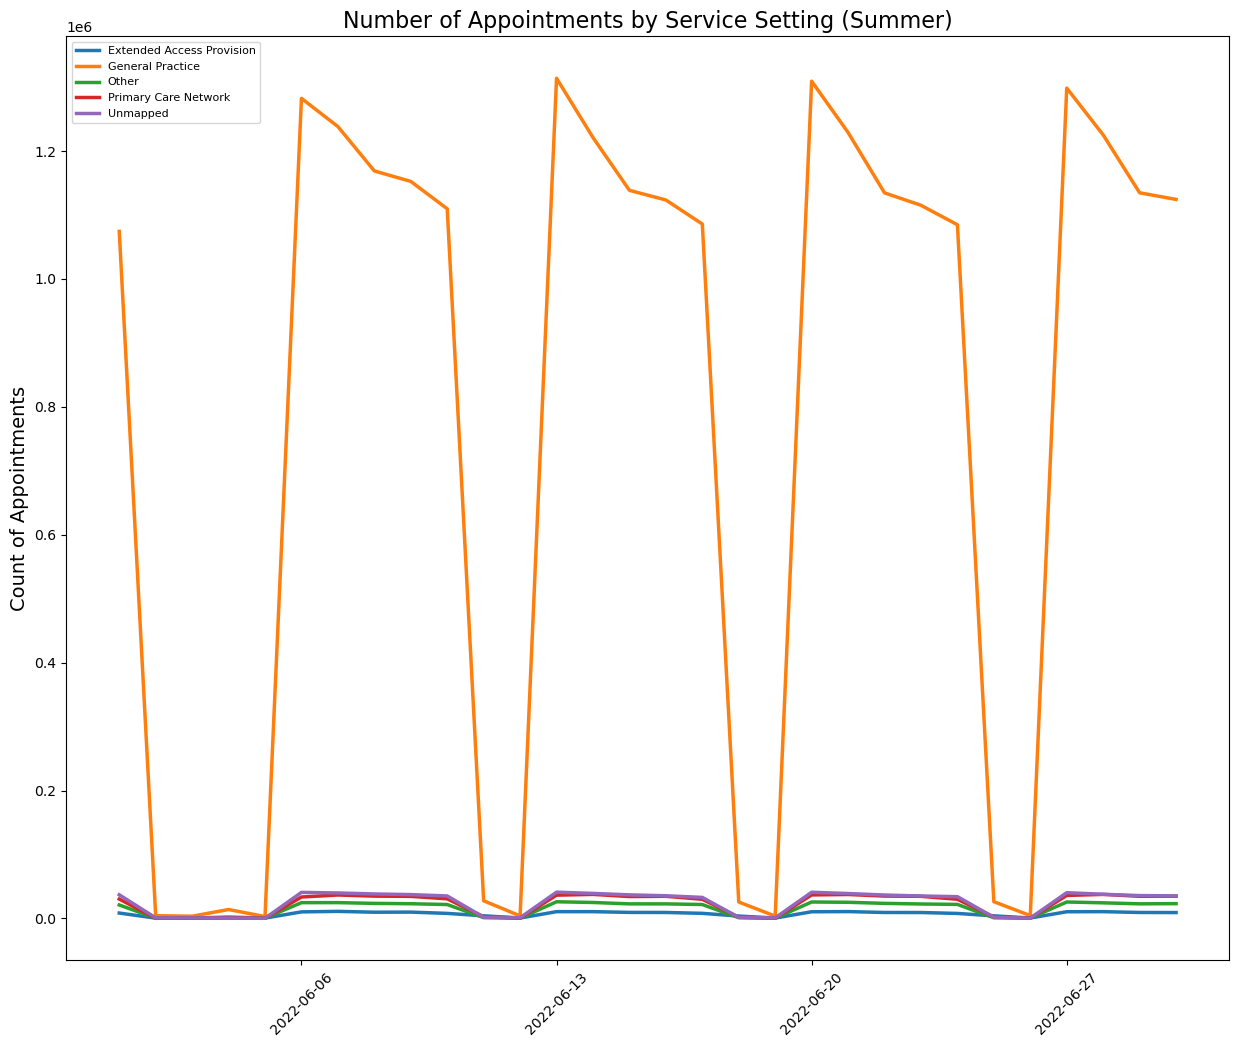

In [75]:
# Filtering for summer months 
summer_data = nc[nc['appointment_date'].dt.strftime('%Y-%m').isin(['2022-06'])]

# Grouping by 'appointment_date' and 'service_setting' and summing 'count_of_appointments'
summer_counts = summer_data.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Creating the lineplot
plt.figure(figsize=(15, 12)) 
sns.lineplot(x='appointment_date', y='count_of_appointments',
             data=summer_counts, hue='service_setting',
             linewidth=2.5, errorbar=None)

# Customize the legend / add title and labels
plt.legend(fontsize='8', loc='upper left')
plt.title('Number of Appointments by Service Setting (Summer)', fontsize=16)
plt.xlabel('')
plt.ylabel('Count of Appointments', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45) 

# Date format
# Start weeks on Monday
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))

# Saving as jpeg
plt.savefig("visuals_summer.jpeg", format="jpeg", dpi=200)

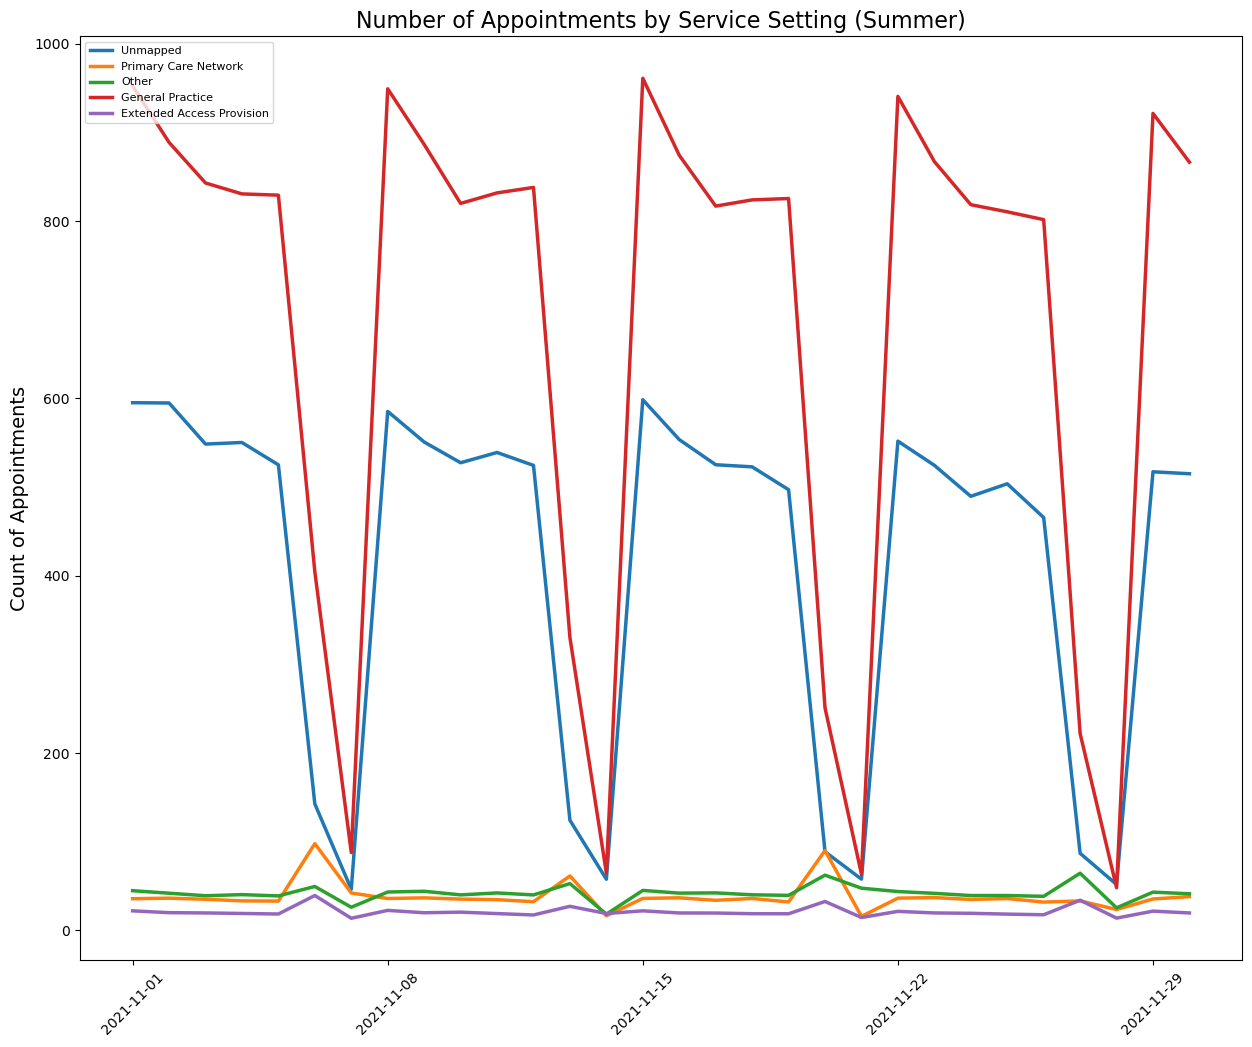

In [76]:
# Filtering for November 
# (month with the highest number of appoinments)
november_data = nc[nc['appointment_date'].dt.strftime('%Y-%m').isin(['2021-11'])]

# Grouping by 'appointment_date' and 'service_setting' and summing 'count_of_appointments'
summer_counts = summer_data.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Creating the lineplot
plt.figure(figsize=(15, 12)) 
sns.lineplot(x='appointment_date', y='count_of_appointments',
             data=november_data, hue='service_setting',
             linewidth=2.5, errorbar=None)

# Customize the legend / add title and labels
plt.legend(fontsize='8', loc='upper left')
plt.title('Number of Appointments by Service Setting (Summer)', fontsize=16)
plt.xlabel('')
plt.ylabel('Count of Appointments', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45) 

# Date format
# Start weeks on Monday
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=1))

# Saving as jpeg
plt.savefig("visuals_summer.jpeg", format="jpeg", dpi=200)

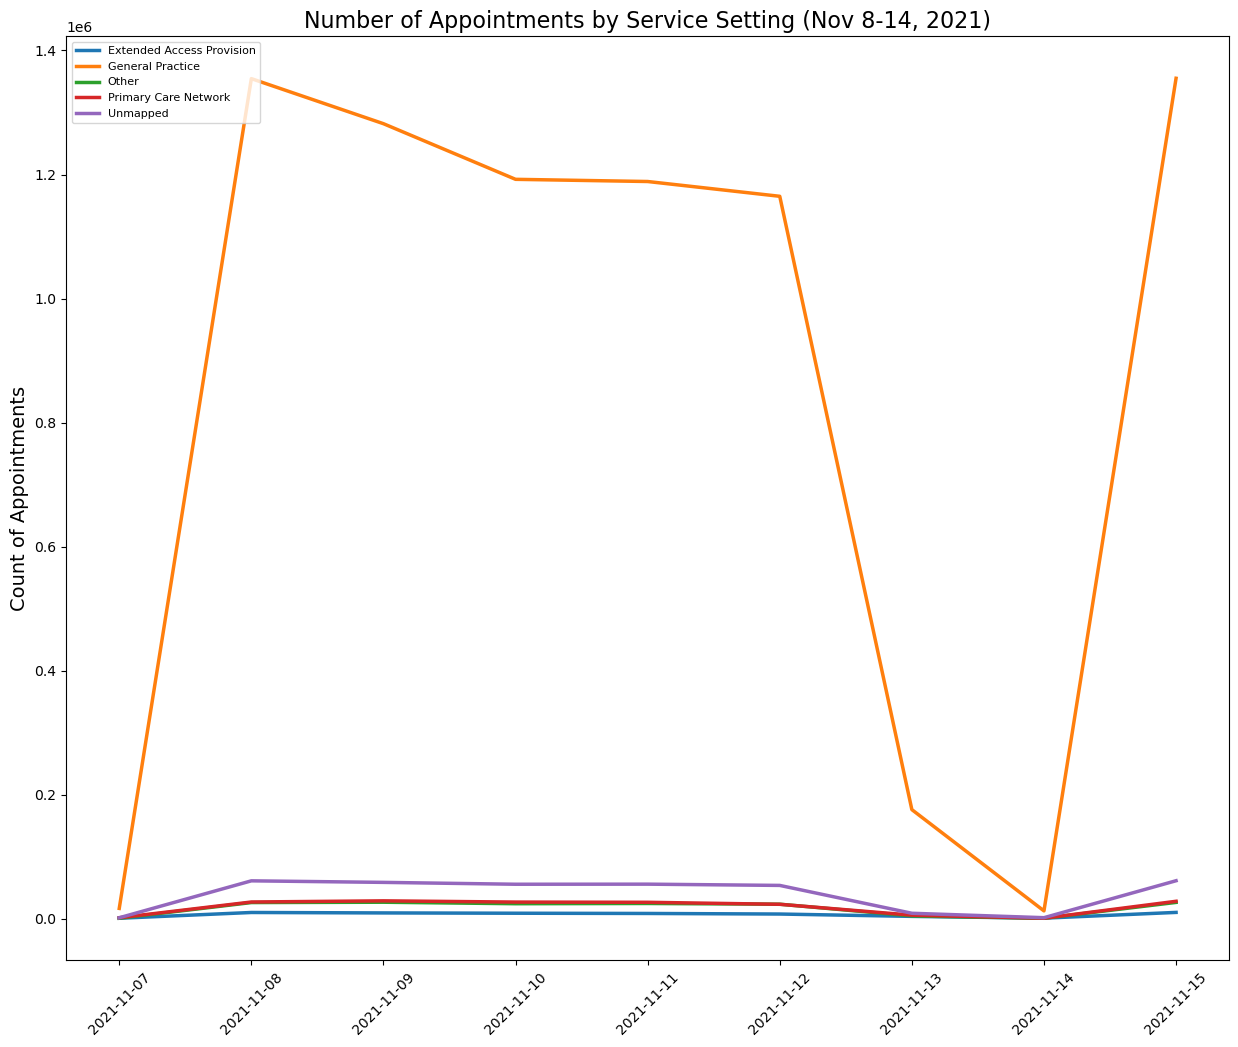

In [77]:
# Filtering for the week of November 8 to November 14, 2021
autumn_data_week = nc[(nc['appointment_date'] >= '2021-11-07') & (nc['appointment_date'] <= '2021-11-15')]

# Grouping by 'appointment_date' and 'service_setting' and summing 'count_of_appointments'
autumn_week_counts = autumn_data_week.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Creating the lineplot
plt.figure(figsize=(15, 12)) 
sns.lineplot(x='appointment_date', y='count_of_appointments',
             data=autumn_week_counts, hue='service_setting',
             linewidth=2.5, errorbar=None)

# Customize the legend / add title and labels
plt.legend(fontsize='8', loc='upper left')
plt.title('Number of Appointments by Service Setting (Nov 8-14, 2021)', fontsize=16)
plt.xlabel('')
plt.ylabel('Count of Appointments', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45) 

# Date format
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

# Saving as jpeg
plt.savefig("visuals_autumn_week.jpeg", format="jpeg", dpi=200)

In [78]:
# Filtering for august - representing Summer months 
week_weekend = nc[nc['appointment_date']>= '2021-08-01']
# Grouping by 'appointment_date' and 'service_setting' 
# and summing 'count_of_appointments'
week_weekend_counts = week_weekend.groupby(['appointment_date', 'service_setting'])\
['count_of_appointments'].sum().reset_index()
# Assuming 'appointment_month' represents the full appointment date
week_weekend_counts['day_of_week'] = week_weekend_counts['appointment_date']\
.dt.day_name()
# Group by 'day_of_week' and sum the appointments
appointments_by_day = week_weekend_counts.groupby('day_of_week')\
['count_of_appointments']\
.sum().reset_index()
# To see the result
appointments_by_day

,day_of_week,count_of_appointments
0,Friday,52394868
1,Monday,59695267
2,Saturday,5574922
3,Sunday,614161
4,Thursday,56976354
5,Tuesday,61806933
6,Wednesday,58984265


In [79]:
# Calculate the total number of appointments
total_appointments = appointments_by_day['count_of_appointments'].sum()
# Calculate the percentage of appointments for each day
appointments_by_day['percentage'] = (appointments_by_day
['count_of_appointments']/total_appointments)*100
# To see the result
appointments_by_day

,day_of_week,count_of_appointments,percentage
0,Friday,52394868,17.698172
1,Monday,59695267,20.164134
2,Saturday,5574922,1.883122
3,Sunday,614161,0.207454
4,Thursday,56976354,19.245727
5,Tuesday,61806933,20.877422
6,Wednesday,58984265,19.923968


Created time series for each season revealed a weekly pattern, with peak appointments at the beginning of each week, followed by a decline toward the weekend, confirming that weekly fluctuations were not season-dependent. 

# F. Exploring the Correlation Between Appointment Frequency and the Interval Between Booking and Appointment Dates


In [82]:
# Filter appointments to show data from August.
ar_gr_by_apdate = ar[ar['appointment_month'] >= '2021-08-01']
# Group by 'time_between_book_and_appointment' 
# and sum 'count_of_appointments' 
ap_intervals = ar_gr_by_apdate.groupby(['time_between_book_and_appointment'])\
['count_of_appointments'].sum().reset_index()
# Viewing data
print(ar_gr_by_apdate)
print(ap_intervals)


       icb_ons_code appointment_month appointment_status hcp_type  \
3652      E54000034        2021-08-01           Attended       GP   
3653      E54000034        2021-08-01           Attended       GP   
3654      E54000034        2021-08-01           Attended       GP   
3655      E54000034        2021-08-01           Attended       GP   
3656      E54000034        2021-08-01           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050        2022-06-01            Unknown  Unknown   
596817    E54000050        2022-06-01            Unknown  Unknown   
596818    E54000050        2022-06-01            Unknown  Unknown   
596819    E54000050        2022-06-01            Unknown  Unknown   
596820    E54000050        2022-06-01            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
3652       Face-to-Face                             1 Day   
3653       Face-to-Face                    15  to

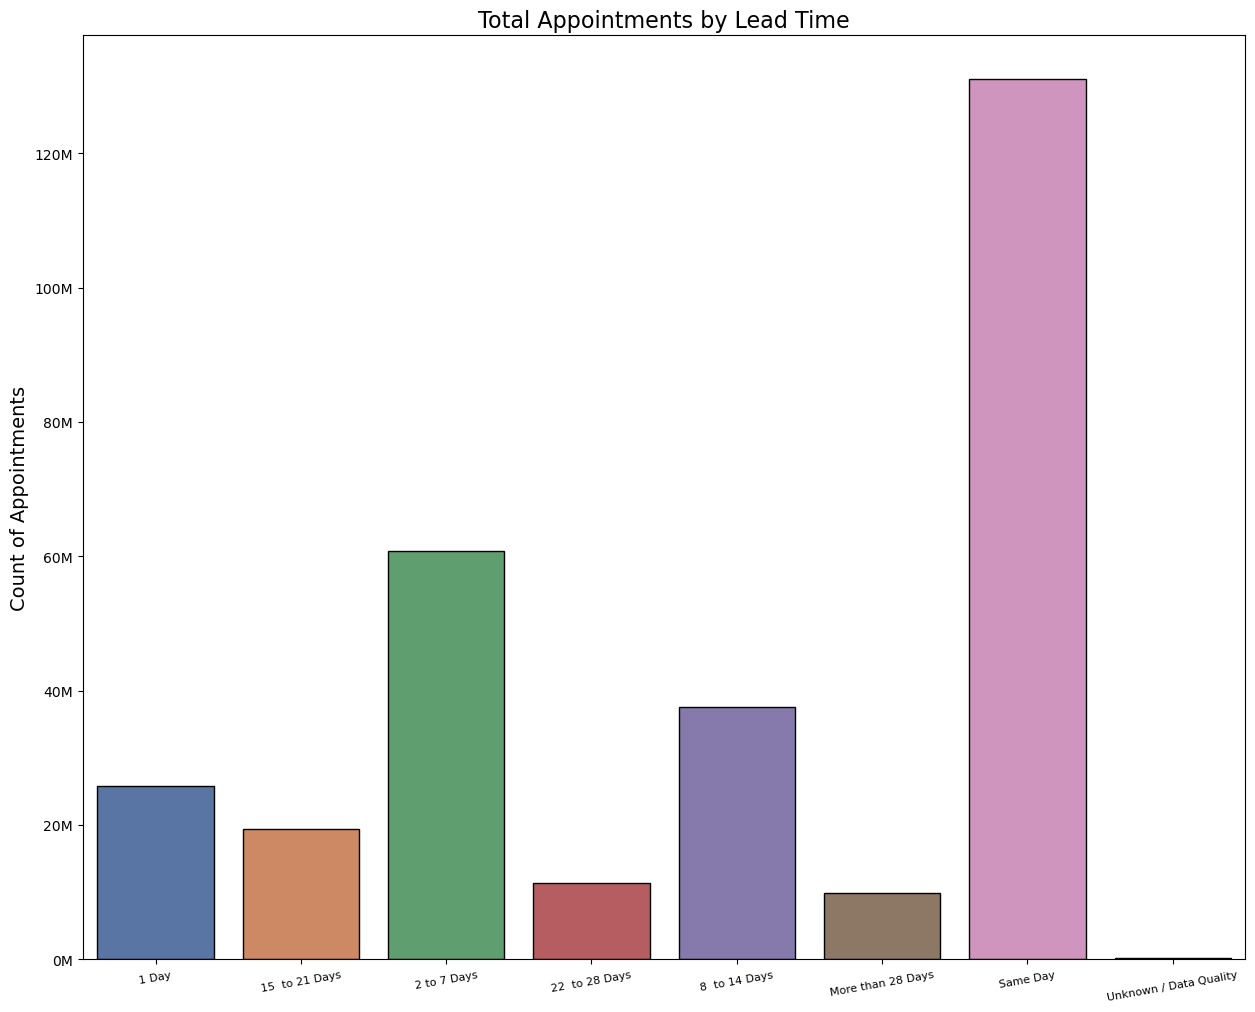

In [142]:
# Importing FuncFormatter to format axis ticks (e.g., 1,000,000 -> 1M)
from matplotlib.ticker import FuncFormatter
# Define a function to format y-axis in millions
def millions(x, pos):
    return f'{int(x / 1_000_000)}M'
# Creating a bar plot
plt.figure(figsize=(15, 12))
sns.barplot(x='time_between_book_and_appointment', 
            y='count_of_appointments', data=ap_intervals,
            hue='time_between_book_and_appointment',
            palette='deep',edgecolor='black')
# Set titles and labels
plt.title('Total Appointments by Lead Time',fontsize=16)
plt.xlabel('')
plt.ylabel('Count of Appointments',fontsize=14)
# Rotate x-axis labels for better readability
plt.xticks(rotation=10,fontsize=8)  
# Apply the millions formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
# Saving as jpeg
plt.savefig(("visuals6.jpeg"), format="jpeg", dpi=200)
# Show the plot
plt.show()

 A bar chart highlights that the majority of appointments were scheduled and conducted on the same day (130 million), with a secondary peak for appointments conducted 2–7 days after booking (61 million). This pattern could partially explain the observed appointment fluctuations and rates of missed appointments. 

# G. Analyzing the Association Between the Number of Appointments and Appointment Mode

In [86]:
# Filtering the dataset to include only appointments from August 1, 2021
ar_gr_by_apdate = ar[ar['appointment_month'] >= '2021-08-01']
# Grouping the filtered data then calculating
# the total count of appointments for each combination
ar_mode = ar_gr_by_apdate.groupby(['appointment_mode','appointment_month'])\
['count_of_appointments'].sum().reset_index()
ar_mode.head()

,appointment_mode,appointment_month,count_of_appointments
0,Face-to-Face,2021-08-01,13717325
1,Face-to-Face,2021-09-01,17266602
2,Face-to-Face,2021-10-01,19471561
3,Face-to-Face,2021-11-01,19031327
4,Face-to-Face,2021-12-01,15312340


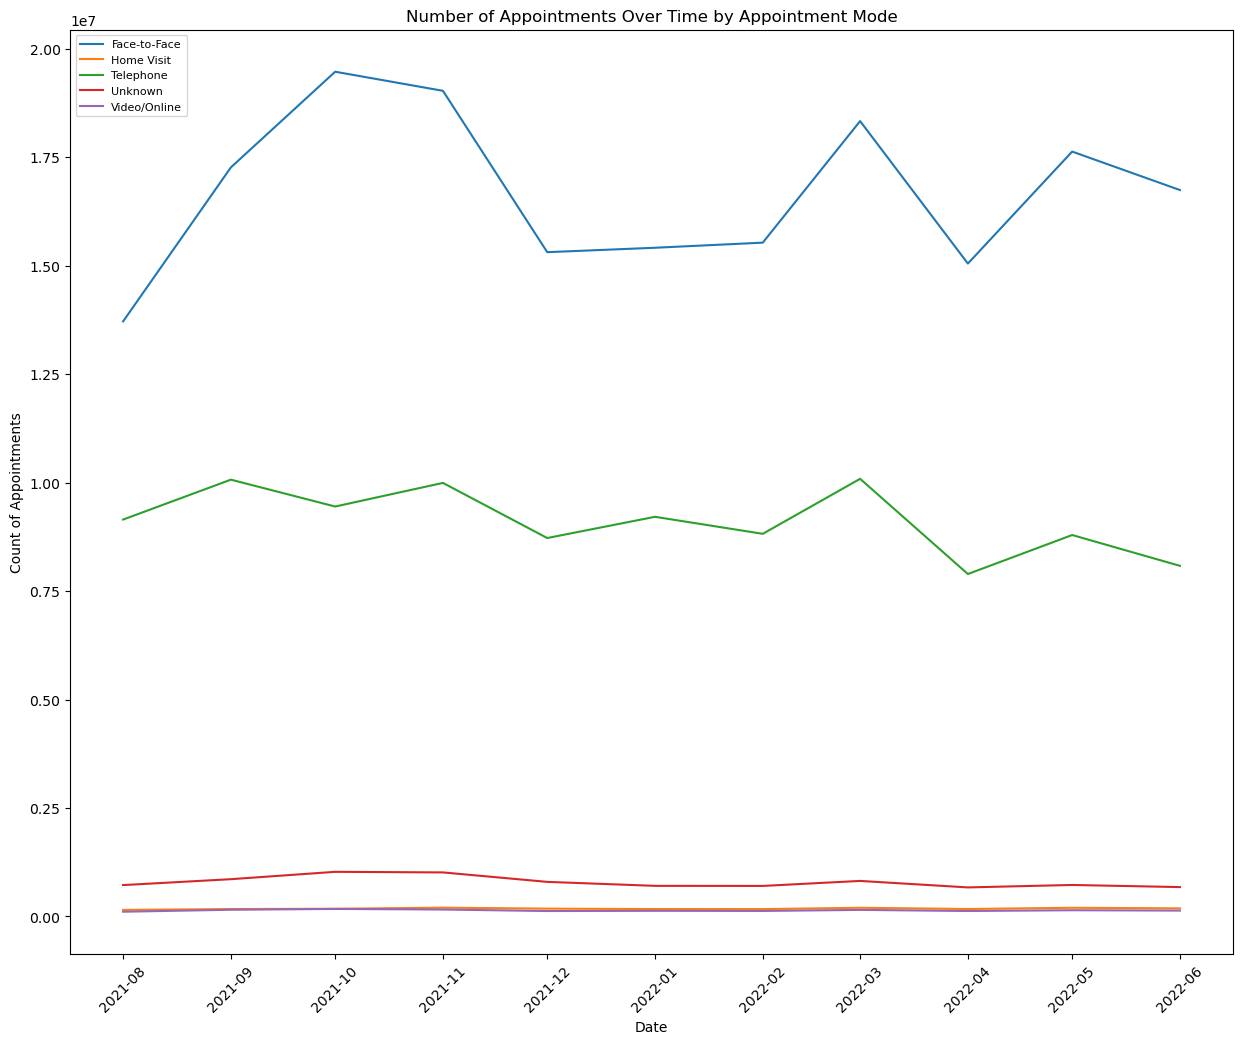

In [87]:
# Set the figure size first
plt.figure(figsize=(15, 12))  
# Creating lineplot
sns.lineplot(x='appointment_month', 
             y='count_of_appointments', 
             data=ar_mode, 
             hue='appointment_mode', 
             errorbar=None)
# Set titles and labels
plt.legend(fontsize='8', loc='upper left')
plt.title('Number of Appointments Over Time by Appointment Mode')
plt.xlabel('Date')
plt.ylabel('Count of Appointments')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45) 
# Saving as jpeg
plt.savefig(("visuals8.jpeg"), format="jpeg", dpi=200)

The line chart reveals a low utilization of video/online appointments, which could play a key role in alleviating the pressure of face-to-face appointments and avoiding long delays and potential missed appointments.

# H. Calculating Appointment Utilization
Utilization Percentage: The calculated percentage indicates how much of the available capacity is being used.

In [90]:
# Grouped by 'appointment_month' and 'count of appointments'
ar_gr_by = ar.groupby('appointment_month', as_index=False)\
['count_of_appointments'].sum()
ar_gr_by.rename(columns={'count_of_appointments': 
                         'total_appointments'}, inplace=True)
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])

In [91]:
# Ensure appointment_month is in datetime format for calculations
ar_gr_by['appointment_month'] = pd.to_datetime(ar_gr_by['appointment_month'])
# Calculate utilization using 22 weekdays.
ar_gr_by['utilisation'] = (ar_gr_by['total_appointments']/22)/1200000*100 
# as a percentage 
ar_gr_by['utilisation'] = ar_gr_by['utilisation'].round(1)
# Filtering the DataFrame for appointment months from August 2021 onwards
ar_gr_by_filtered = ar_gr_by[ar_gr_by['appointment_month']>='2021-08-01']
# View the DataFrame
print(ar_gr_by_filtered)

   appointment_month  total_appointments  utilisation
19        2021-08-01            23852171         90.3
20        2021-09-01            28522501        108.0
21        2021-10-01            30303834        114.8
22        2021-11-01            30405070        115.2
23        2021-12-01            25140776         95.2
24        2022-01-01            25635474         97.1
25        2022-02-01            25355260         96.0
26        2022-03-01            29595038        112.1
27        2022-04-01            23913060         90.6
28        2022-05-01            27495508        104.1
29        2022-06-01            25828078         97.8


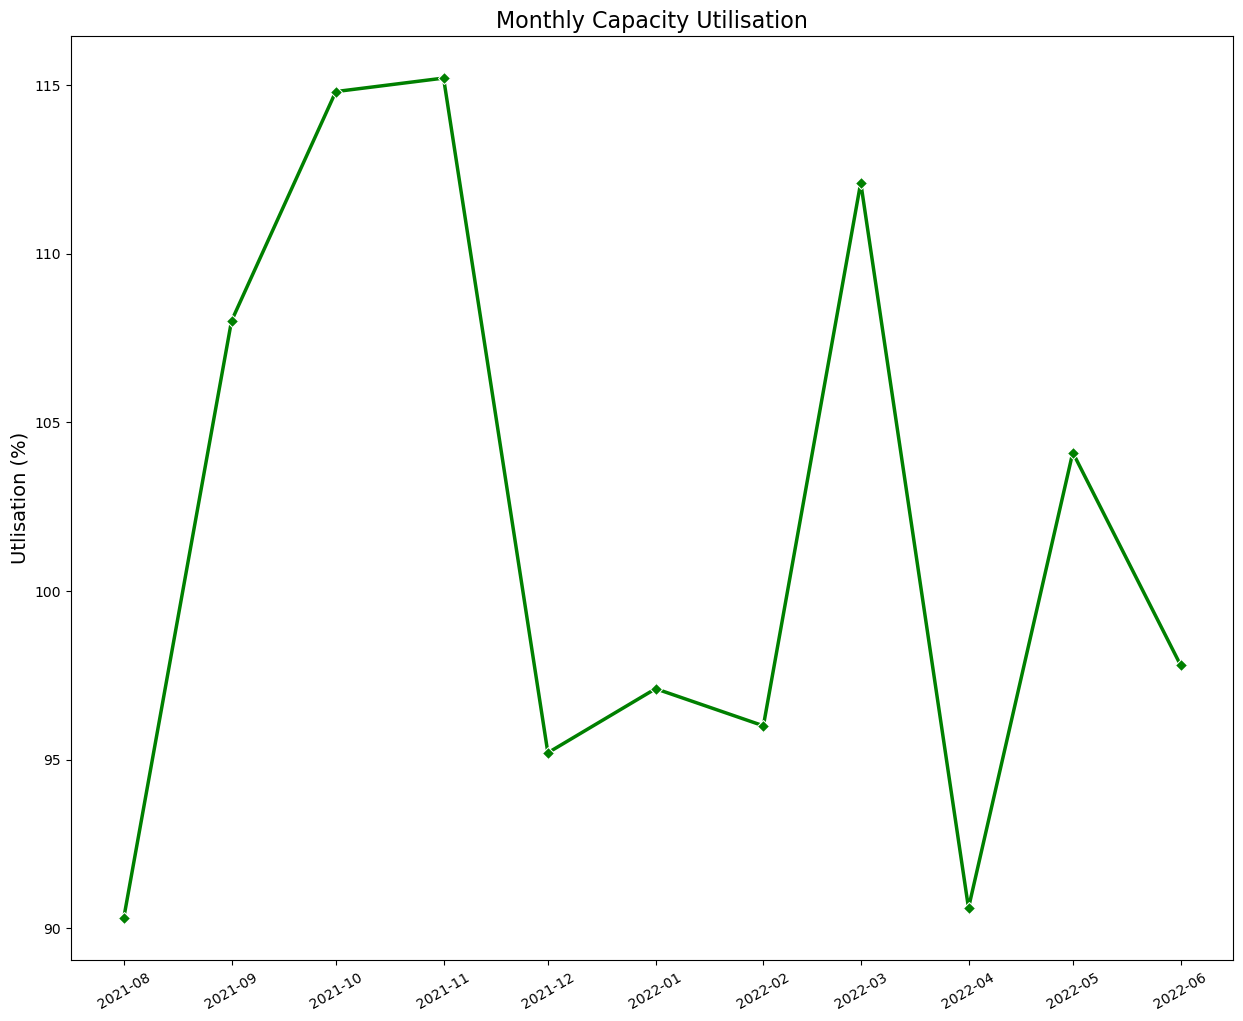

In [92]:
# Set the figure size first
plt.figure(figsize=(15, 12))  
# Creating lineplot
sns.lineplot(x='appointment_month', 
             y='utilisation', 
             data=ar_gr_by_filtered,
             linewidth=2.5,marker='D', 
             color='green',errorbar=None)
# Set titles and labels
plt.title('Monthly Capacity Utilisation',fontsize=16)
plt.xlabel('')
plt.ylabel('Utlisation (%)',fontsize=14)
# Rotate x-axis labels for better visibility
plt.xticks(rotation=30) 
# Saving as jpeg
plt.savefig(("visuals10.jpeg"), format="jpeg", dpi=200)

This analysis reveales aseasonal fluctuations, with capacity utilization surpassing 100% during peak periods, particularly in Autumn and March. These findings indicate a pressing need to increase staff and expand capacity in regions with high demand. 

# I. Exploring the Potential Value of Social Media Data (Twitter) for the NHS

In [95]:
# Load the tweets data set.
tweets=pd.read_csv('tweets.csv')
# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en


In [96]:
# Selects only the 'tweet_full_text' column from the tweets DataFrame.
tweets_text = tweets[['tweet_full_text']]
# Looping through the messages to create a list of values containing the # symbol
hashtag_tweets = [tweet for tweet in tweets_text['tweet_full_text'] if '#' in tweet]
# View the first 5 records
hashtag_tweets[:5]

['As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-being of our community as our next https://t.co/yw0cstfmSI #Healthcare',
 "RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…",
 'RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…',
 'RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…',
 'ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #digitaltransformation #cybersecurity #accounting #finance #healthcare https://t.co/HC4tTrk8sW']

In [97]:
# Initialize an empty list to store hashtags
tags = []
# Looping through each tweet
for tweet in hashtag_tweets:  
    for word in tweet.split(' '):
        if '#' in word:
            tags.append(word.lower())
# Convert the list of hashtags into a DataFrame
tags_df = pd.DataFrame(tags, columns=['hashtag'])
# Calculate the occurrences of each hashtag
tags_df['count'] = tags_df.groupby('hashtag')['hashtag'].transform('count')
# Drop duplicates to only keep unique hashtags with their counts
tags_df = tags_df.drop_duplicates()
# Filter to display hashtags that appear more than 10 times
filtered_tags_df = tags_df[tags_df['count'] > 10]
# Sorting to get 10 top values
top_10_tags_df = filtered_tags_df.sort_values(by='count',
                                              ascending=False).head(10)
top_10_tags_df

,hashtag,count
0,#healthcare,716
261,#health,80
128,#medicine,41
503,#ai,40
41,#job,38
129,#medical,35
134,#strategy,30
146,#pharmaceutical,28
144,#pharma,25
523,#digitalhealth,25


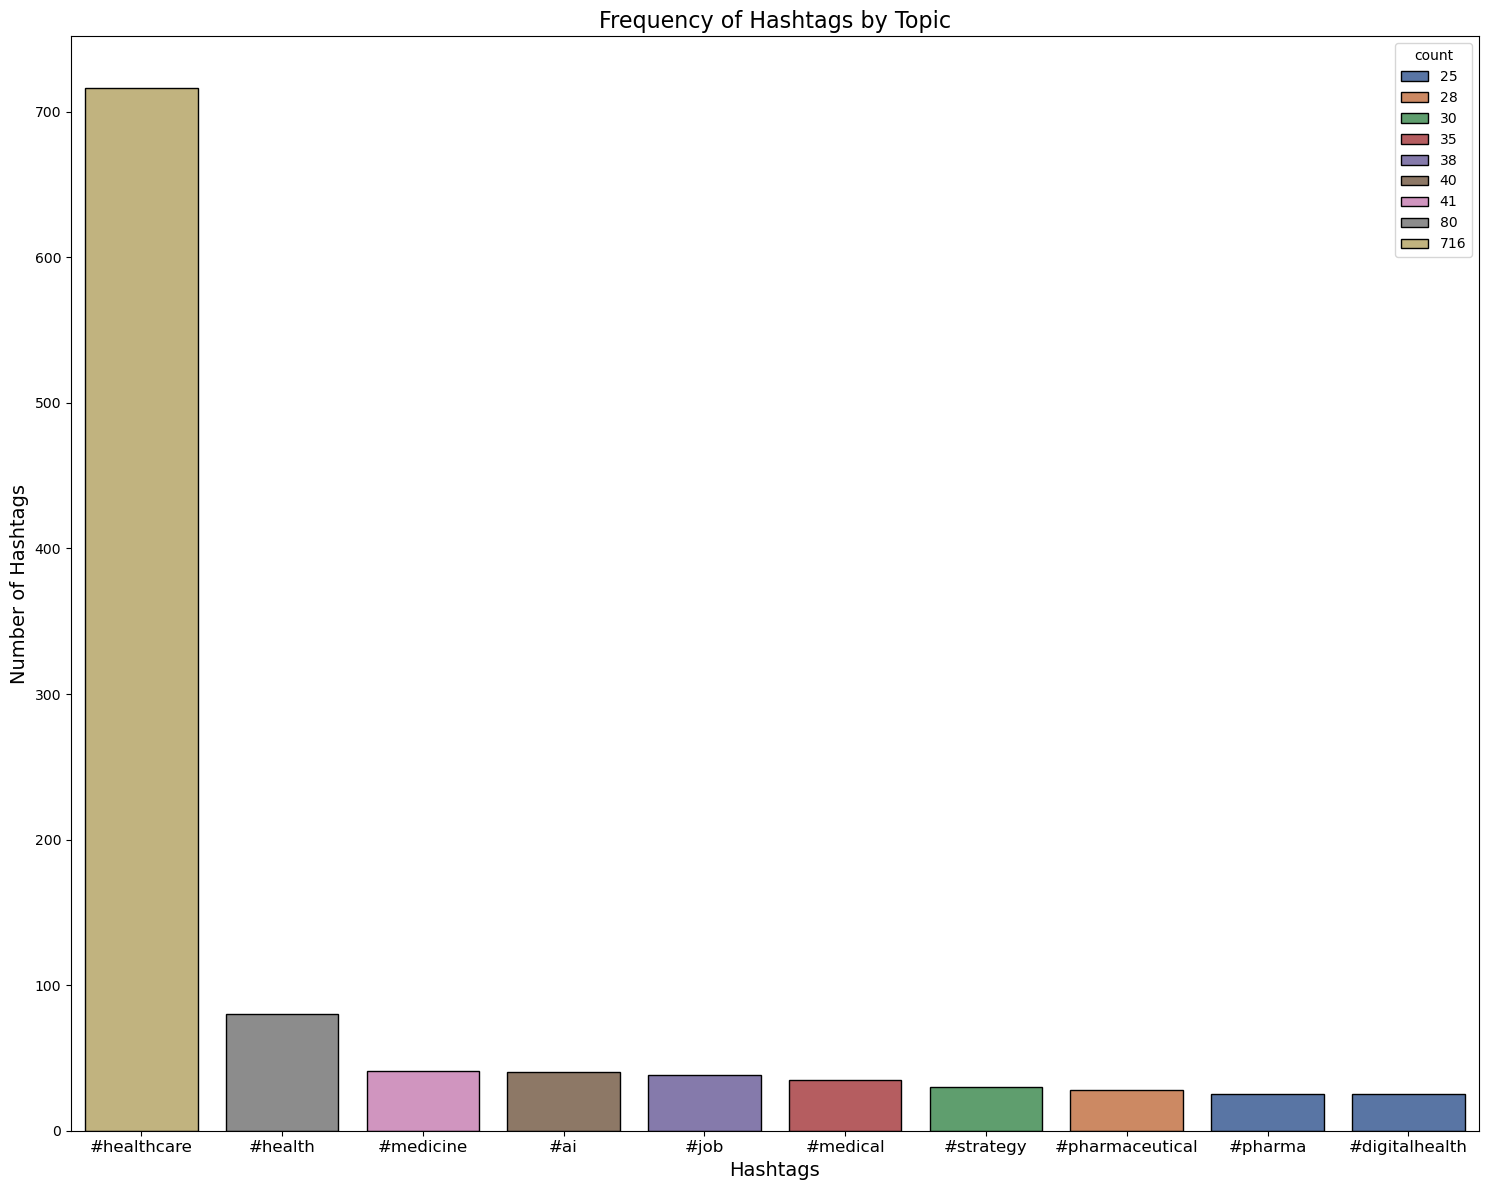

In [144]:
# Set the figure size
plt.figure(figsize=(15, 12))
# Create the bar plot
sns.barplot(y='count', x='hashtag', data=top_10_tags_df,
            hue='count', palette='deep',edgecolor='black')
# Set titles and labels
plt.title('Frequency of Hashtags by Topic',fontsize=16)
plt.ylabel('Number of Hashtags',fontsize=14)
plt.xlabel('Hashtags',fontsize=14)
# Change the font size of x-axis labels
plt.xticks(fontsize=12) 
# Show the plot
plt.tight_layout()
# Saving as jpeg
plt.savefig(("visuals11.jpeg"), format="jpeg", dpi=200)
plt.show()

Chart presents a high volume of #healthcare mentions, highlights an opportunity to engage with the public to gain deeper insights into service experiences, communicate important announcements, and share job openings.

# J. Conclusion

The analysis indicates that NHS service capacity is under significant strain, with appointment utilization averaging around 90% during off-peak seasons and exceeding 100% during peak seasons (Autumn and March). Regional variations in demand highlight areas where additional staffing and resources may be necessary.

An examination of booking lead times reveals that a large proportion of appointments are scheduled 2–7 days in advance, often leading to overbooking at the start of each week. This pattern increases the likelihood of missed appointments, as patient circumstances can change over time. To address this, prioritizing same-day or next-day appointments could help distribute demand more evenly throughout the week. Additionally, increasing the use of alternative service settings, such as telephone appointments, may help alleviate strain.

Finally, analyzing Twitter data suggests an opportunity for the NHS to engage with patients, gather insights into patient experiences, and provide timely updates regarding capacity and resource challenges.